In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/CellType_Psy/src')
from CellType_PSY import *
import statsmodels.api as sm
from statsmodels.stats.multitest import fdrcorrection, multipletests
#import scanpy as sc
HGNC, ENSID2Entrez, GeneSymbol2Entrez, vv = LoadGeneINFO()
os.chdir("/home/jw3514/Work/CellType_Psy/notebooks3/")
print(f"Current working directory: {os.getcwd()}")

Current working directory: /home/jw3514/Work/CellType_Psy/notebooks3


In [2]:
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/msttcorefonts/Arial.ttf'
fm.fontManager.addfont(font_path)  # Only if you're adding a new font file
fm._load_fontmanager(try_read_cache=False)

# HumanCT IQ Phenotype


In [3]:
#CT_Bias = pd.read_csv("test.ct.z2.bias.csv", index_col="STR")
#CT_Bias = pd.read_csv("../../CellType_Psy/dat/Bias/ASD.Spark61.CT.hc.bias.csv", index_col=0)
#HCT_Z2_MAT_HCT = pd.read_csv("../dat/HumanCTExpressionMats/Human.Cluster.Log2Mean.Z1clip5.Z2.clip3.Dec30.csv", index_col=0)
HCT_Z2_MAT_HCT = pd.read_csv("../dat/HumanCTExpressionMats/Human.Cluster.Log2Mean.Z1clip5.Z2.clip3.Jan21.csv", index_col=0)
max_Z, min_Z = 3, -3
HCT_Z2_MAT_HCT = HCT_Z2_MAT_HCT.clip(upper=max_Z, lower=min_Z)
HCT_Z2_MAT_HCT.columns = [int(x) for x in HCT_Z2_MAT_HCT.columns.values]

In [4]:
specificity_scores = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Cluster.Spec.Score.csv", index_col=0)
specificity_scores.columns = specificity_scores.columns.astype(int)

In [5]:
Mut_n_IQ = pd.read_csv("../dat/ASD_IQ_Mut.csv")
Mut_n_IQ.columns.values

array(['IID', 'Sex', 'Pheno', 'VarID', 'GeneID', 'HGNC', 'GeneEff',
       'REVEL', 'ExACpLI', 'Entrez', 'IQ'], dtype=object)

In [6]:
Spark_Denovo = pd.read_excel("../../ASD_Circuits/notebooks_v2/dat_in/41588_2022_1148_MOESM4_ESM.xlsx",
                           skiprows=2, sheet_name="Table S7")
Spark_Denovo = Spark_Denovo[Spark_Denovo[
    "pDenovoWEST_Meta"]!="."]
Spark_Denovo_ExomeWide = Spark_Denovo[Spark_Denovo[
    "pDenovoWEST_Meta"]<=1.3e-6]
Spark_Denovo_ExomeWide.shape

(61, 56)

In [7]:
top_Genes = Spark_Denovo.head(61)["HGNC"].values
Mut_n_IQ_conf = Mut_n_IQ[Mut_n_IQ["HGNC"].isin(top_Genes)]
Mut_n_IQ_conf.shape

(221, 11)

In [83]:
top_Genes_500 = Spark_Denovo.head(500)["HGNC"].values
Mut_n_IQ_conf_500 = Mut_n_IQ[Mut_n_IQ["HGNC"].isin(top_Genes_500)]
Mut_n_IQ_conf_500.shape

(400, 11)

In [8]:
#### Gene Level
Genes = list(set(Mut_n_IQ_conf["Entrez"].values))
data = []
for g in Genes:
    tmp_df = Mut_n_IQ_conf[Mut_n_IQ_conf["Entrez"]==g]
    avg_IQ = tmp_df["IQ"].mean()
    row = [g, avg_IQ]
    data.append(row)
columns = ["Entrez", "IQ"]
Avg_Gene_IQ_DF = pd.DataFrame(data=data, columns=columns)

In [84]:
#### Gene Level
Genes = list(set(Mut_n_IQ_conf_500["Entrez"].values))
data = []
for g in Genes:
    tmp_df = Mut_n_IQ_conf_500[Mut_n_IQ_conf_500["Entrez"]==g]
    avg_IQ = tmp_df["IQ"].mean()
    row = [g, avg_IQ]
    data.append(row)
columns = ["Entrez", "IQ"]
Avg_Gene_IQ_DF_500 = pd.DataFrame(data=data, columns=columns)

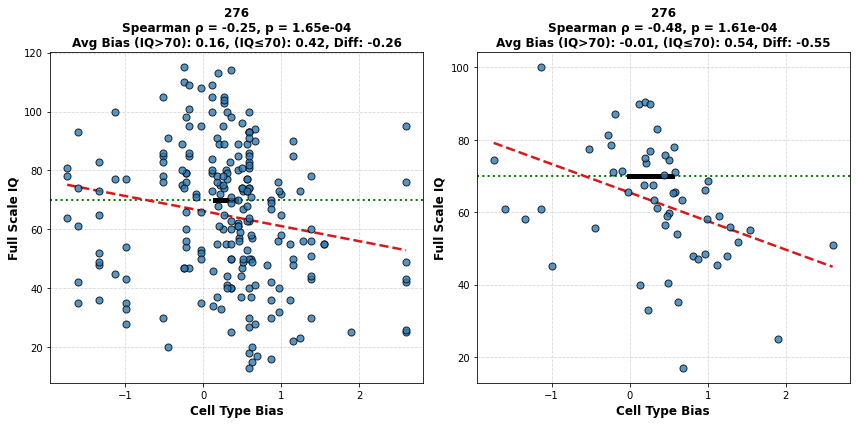

In [9]:
STR = 276
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
Plot_Bias_vs_IQ_HumanCT(STR, Mut_n_IQ_conf, HCT_Z2_MAT_HCT, ax=ax1)
Plot_Bias_vs_IQ_HumanCT(STR, Avg_Gene_IQ_DF, HCT_Z2_MAT_HCT, ax=ax2)
plt.tight_layout()
plt.show()

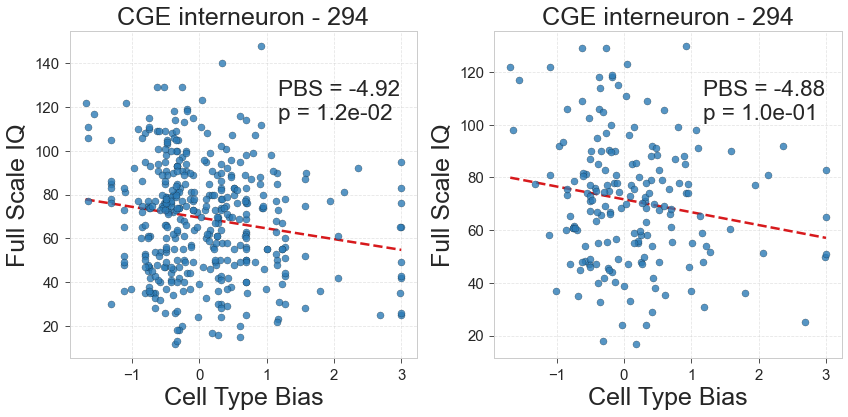

In [86]:
STR = 294
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
Plot_Bias_vs_IQ_HumanCT(STR, Mut_n_IQ_conf_500, HCT_Z2_MAT_HCT, ax=ax1)
Plot_Bias_vs_IQ_HumanCT(STR, Avg_Gene_IQ_DF_500, HCT_Z2_MAT_HCT, ax=ax2)
plt.tight_layout()
plt.show()

In [10]:
STR = 276
biases, IQs = BiasVsPheno(Avg_Gene_IQ_DF, HCT_Z2_MAT_HCT , STR, 'XX')
# save biases, IQs to file
np.savetxt("biases.txt", biases)
np.savetxt("IQs.txt", IQs)

# load biases, IQs from file 
biases = np.loadtxt("biases.txt")
IQs = np.loadtxt("IQs.txt")


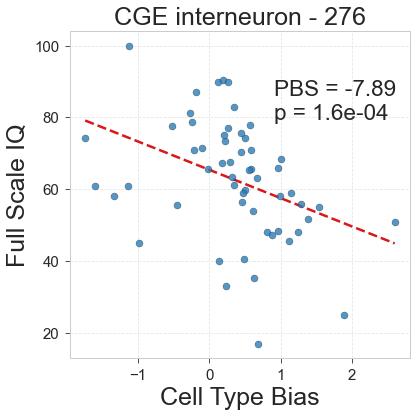

In [82]:
STR = 276
plt.style.use('seaborn-v0_8-paper')
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
#Plot_Bias_vs_IQ_HumanCT(STR, Mut_n_IQ_conf, HCT_Z2_MAT_HCT, ax=ax1)
Plot_Bias_vs_IQ_HumanCT(STR, Avg_Gene_IQ_DF, HCT_Z2_MAT_HCT, ax=ax1)
plt.tight_layout()
plt.show()

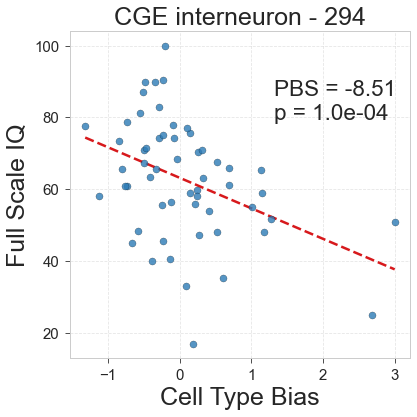

In [72]:
STR = 294
plt.style.use('seaborn-v0_8-paper')
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
#Plot_Bias_vs_IQ_HumanCT(STR, Mut_n_IQ_conf, HCT_Z2_MAT_HCT, ax=ax1)
Plot_Bias_vs_IQ_HumanCT(STR, Avg_Gene_IQ_DF, HCT_Z2_MAT_HCT, ax=ax1, Pval=0.0001)
plt.tight_layout()
plt.show()

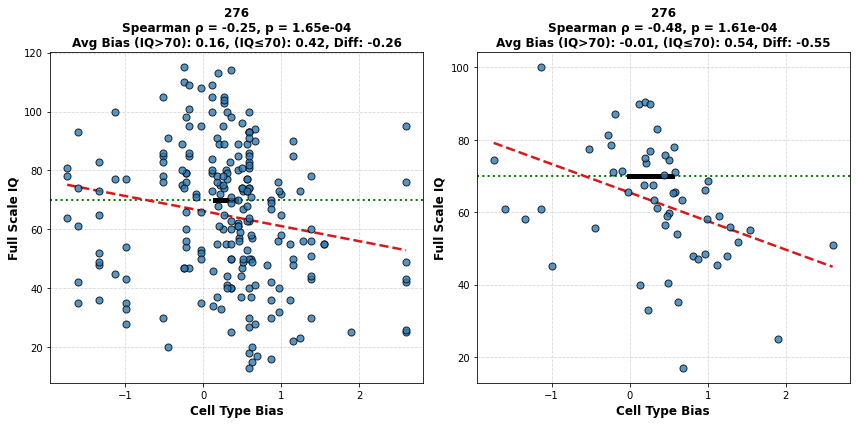

In [11]:
STR = 276
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
Plot_Bias_vs_IQ_HumanCT(STR, Mut_n_IQ_conf, HCT_Z2_MAT_HCT, ax=ax1)
Plot_Bias_vs_IQ_HumanCT(STR, Avg_Gene_IQ_DF, HCT_Z2_MAT_HCT, ax=ax2)
plt.tight_layout()
plt.show()

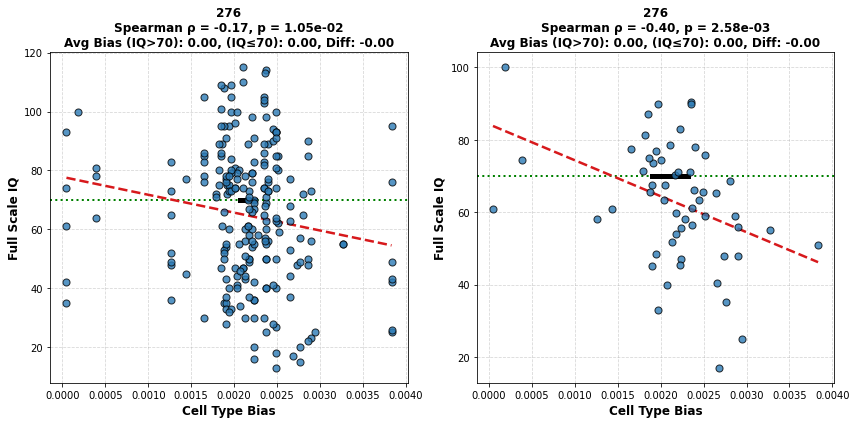

In [12]:
STR = 276
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
Plot_Bias_vs_IQ_HumanCT(STR, Mut_n_IQ_conf, specificity_scores, ax=ax1)
Plot_Bias_vs_IQ_HumanCT(STR, Avg_Gene_IQ_DF, specificity_scores, ax=ax2)
plt.tight_layout()
plt.show()

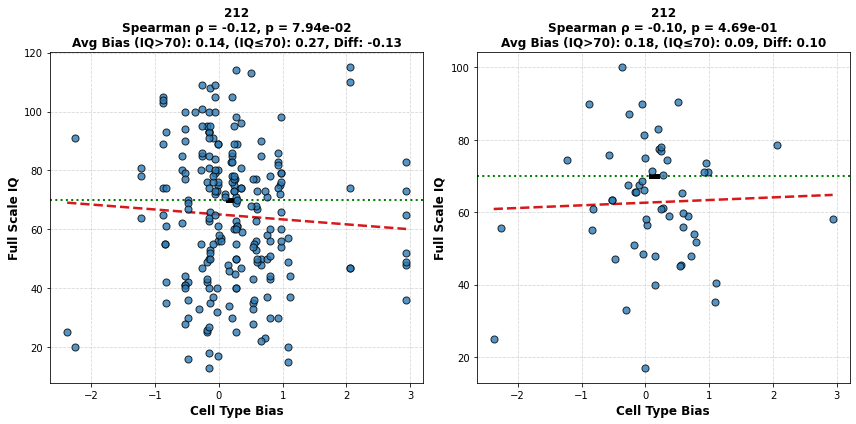

In [13]:
STR = 212
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
Plot_Bias_vs_IQ_HumanCT(STR, Mut_n_IQ_conf, HCT_Z2_MAT_HCT, ax=ax1)
Plot_Bias_vs_IQ_HumanCT(STR, Avg_Gene_IQ_DF, HCT_Z2_MAT_HCT, ax=ax2)
plt.tight_layout()
plt.show()

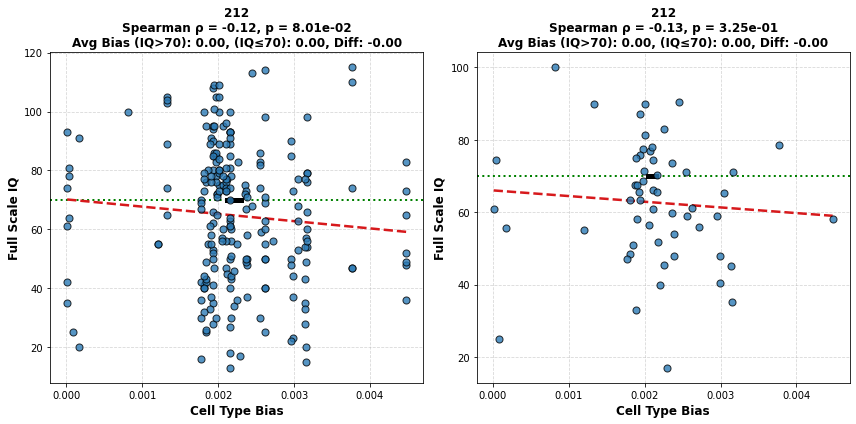

In [14]:
STR = 212
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
Plot_Bias_vs_IQ_HumanCT(STR, Mut_n_IQ_conf, specificity_scores, ax=ax1)
Plot_Bias_vs_IQ_HumanCT(STR, Avg_Gene_IQ_DF, specificity_scores, ax=ax2)
plt.tight_layout()
plt.show()

In [15]:
Neuron_idx = Anno[Anno["Supercluster"].isin(Neurons)].index.values

In [16]:
def linear_fit(biases, IQs, alpha=0.05):
    model = sm.OLS(IQs, sm.add_constant(biases))
    results = model.fit()
    
    intercept = results.params[0]
    beta = results.params[1]
    # get CI of beta
    ci = results.conf_int(alpha=alpha)

    ci_low = ci[1][0]
    ci_high = ci[1][1]     
    r_value = results.rsquared
    p_value = results.pvalues[1]
    std_err = results.bse[1]
    rho, p_rho = spearmanr(biases, IQs)
    r, p_r = pearsonr(biases, IQs)
    
    return intercept, beta, ci_low, ci_high, r_value, p_value, std_err, rho, p_rho, r, p_r

def Make_HumanCT_DF(Mut_n_IQ_conf, HCT_Z2_MAT_HCT, output_file, alpha=0.05):
    names, supercluster, spearmanr, spearmanp, pearsonr, pearsonp, beta_values, beta_ci_low, beta_ci_high, intercept_values, r_value_values, p_value_values, std_err_values = [],[],[],[],[],[],[],[],[],[],[],[],[]
    for Idx in HCT_Z2_MAT_HCT.columns.values:
        biases, IQs = BiasVsPheno(Mut_n_IQ_conf, HCT_Z2_MAT_HCT , Idx, 'xx')
        intercept, beta, ci_low, ci_high, r_value, p_value, std_err, rho, p_rho, r, p_r = linear_fit(biases, IQs, alpha=0.05)
        
        names.append("{}".format(Idx))
        supercluster.append(Anno.loc[Idx, "Supercluster"])
        spearmanr.append(rho)
        spearmanp.append(p_rho)
        pearsonr.append(r)
        pearsonp.append(p_r)
        beta_values.append(beta)
        beta_ci_low.append(ci_low)
        beta_ci_high.append(ci_high)
        intercept_values.append(intercept)
        r_value_values.append(r_value)
        p_value_values.append(p_value)
        std_err_values.append(std_err)

    str_res_df = pd.DataFrame(data={"CT":names, "Supercluster":supercluster, "SpearmanR":spearmanr, "SpearmanP":spearmanp, 
                                            "PearsonR":pearsonr, "PearsonP":pearsonp, "beta":beta_values, "CI_low":beta_ci_low, "CI_high":beta_ci_high, "intercept":intercept_values, "r_value":r_value_values, 
                                            "p_value":p_value_values, "std_err":std_err_values})
    str_res_df = str_res_df.sort_values("SpearmanR")
    #str_res_df = ADJ_P(str_res_df)
    str_res_df.to_csv(output_file)
    return str_res_df

In [17]:
HumanCT_res_df_MutL = Make_HumanCT_DF(Mut_n_IQ_conf, HCT_Z2_MAT_HCT, "../dat/Pheno_Bias_vs_IQ/HumanCT.MutL.csv")
HumanCT_res_df_GeneL = Make_HumanCT_DF(Avg_Gene_IQ_DF, HCT_Z2_MAT_HCT, "../dat/Pheno_Bias_vs_IQ/HumanCT.GeneL.csv")


In [18]:
HumanCT_res_df_MutL_spec = Make_HumanCT_DF(Mut_n_IQ_conf, specificity_scores, "../dat/Pheno_Bias_vs_IQ/HumanCT.MutL.spec.csv")
HumanCT_res_df_GeneL_spec = Make_HumanCT_DF(Avg_Gene_IQ_DF, specificity_scores, "../dat/Pheno_Bias_vs_IQ/HumanCT.GeneL.spec.csv")

In [19]:
HumanCT_res_df_GeneL_spec.head(20)

CT               Supercluster  SpearmanR  SpearmanP  PearsonR  PearsonP  \
267  267  LAMP5-LHX6 and Chandelier  -0.465256   0.000303 -0.363580  0.005881   
266  266  LAMP5-LHX6 and Chandelier  -0.455344   0.000422 -0.310753  0.019751   
259  259            MGE interneuron  -0.408894   0.001755 -0.373052  0.004630   
294  294            CGE interneuron  -0.405578   0.001928 -0.391178  0.002873   
265  265  LAMP5-LHX6 and Chandelier  -0.402194   0.002121 -0.299763  0.024799   
276  276            CGE interneuron  -0.395085   0.002583 -0.384858  0.003403   
295  295            CGE interneuron  -0.393000   0.002734 -0.382493  0.003623   
268  268  LAMP5-LHX6 and Chandelier  -0.391257   0.002866 -0.322080  0.015488   
260  260            MGE interneuron  -0.382849   0.003589 -0.353279  0.007567   
269  269  LAMP5-LHX6 and Chandelier  -0.381960   0.003674 -0.317467  0.017118   
239  239            MGE interneuron  -0.373347   0.004595 -0.367611  0.005316   
236  236            MGE interneuron  -0.372287   0.004722 -0.368356  0.005217   
271  271  LAMP5-LHX6 and Chandelier  -0.359333   0.006531 -0.292984  0.028425   
296  296            CGE interneuron  -0.353180   0.007585 -0.327186  0.013841   
277  277            CGE interneuron  -0.350104   0.008166 -0.310028  0.020054   
254  254            MGE interneuron  -0.345422   0.009123 -0.335888  0.011378   
293  293            CGE interneuron  -0.343815   0.009474 -0.352370  0.007735   
270  270  LAMP5-LHX6 and Chandelier  -0.341833   0.009922 -0.293409  0.028185   
176  176              Miscellaneous  -0.338927   0.010612 -0.287245  0.031831   
261  261            MGE interneuron  -0.334518   0.011739 -0.335225  0.011552   

             beta        CI_low      CI_high  intercept   r_value   p_value  \
267  -7573.675781 -12868.000885 -2279.350678  78.804082  0.132190  0.005881   
266  -5278.849428  -9684.022722  -873.676135  74.031025  0.096567  0.019751   
259  -8977.697504 -15069.501009 -2885.894000  81.714133  0.139168  0.004630   
294  -8983.903562 -14750.494067 -3217.313057  82.413234  0.153020  0.002873   
265  -5527.746101 -10327.459359  -728.032844  74.215040  0.089858  0.024799   
276  -9935.227593 -16435.908610 -3434.546576  84.276964  0.148116  0.003403   
295  -8765.235625 -14541.985229 -2988.486021  81.631945  0.146301  0.003623   
268  -6196.295525 -11165.390547 -1227.200504  76.070614  0.103736  0.015488   
260  -8535.695331 -14702.560735 -2368.829927  80.741164  0.124806  0.007567   
269  -5791.375267 -10510.979457 -1071.771077  75.436803  0.100786  0.017118   
239  -7934.454558 -13410.839082 -2458.070034  80.162652  0.135138  0.005316   
236 -10366.495626 -17504.730994 -3228.260258  83.927776  0.135686  0.005217   
271  -5612.963644 -10610.439384  -615.487904  74.640496  0.085840  0.028425   
296  -6537.959982 -11689.676361 -1386.243603  77.136300  0.107051  0.013841   
277  -7969.840341 -14637.841628 -1301.839054  80.287476  0.096118  0.020054   
254  -8515.243821 -15030.027826 -2000.459816  80.665845  0.112821  0.011378   
293  -7505.152819 -12943.452144 -2066.853495  79.120050  0.124165  0.007735   
270  -5383.732463 -10169.523236  -597.941691  74.193393  0.086089  0.028185   
176  -6951.403649 -13275.698387  -627.108911  77.662021  0.082510  0.031831   
261  -8543.866736 -15095.119870 -1992.613602  80.435358  0.112376  0.011552   

         std_err  
267  2640.720137  
266  2197.226199  
259  3038.488923  
294  2876.278160  
265  2394.016083  
276  3242.430136  
295  2881.345347  
268  2478.500853  
260  3075.928533  
269  2354.059031  
239  2731.528307  
236  3560.431501  
271  2492.656677  
296  2569.589308  
277  3325.886666  
254  3249.464468  
293  2712.532052  
270  2387.071782  
176  3154.451632  
261  3267.654655

In [20]:
HumanCT_res_df_MutL.sort_values("SpearmanR").head(20)

CT               Supercluster  SpearmanR  SpearmanP  PearsonR  PearsonP  \
266  266  LAMP5-LHX6 and Chandelier  -0.276165   0.000031 -0.203221  0.002400   
267  267  LAMP5-LHX6 and Chandelier  -0.264261   0.000070 -0.219956  0.000996   
276  276            CGE interneuron  -0.250800   0.000165 -0.179129  0.007597   
265  265  LAMP5-LHX6 and Chandelier  -0.231293   0.000528 -0.181628  0.006783   
295  295            CGE interneuron  -0.211654   0.001553 -0.234362  0.000442   
294  294            CGE interneuron  -0.210074   0.001687 -0.238026  0.000357   
293  293            CGE interneuron  -0.209072   0.001778 -0.207441  0.001934   
268  268  LAMP5-LHX6 and Chandelier  -0.203027   0.002423 -0.177772  0.008075   
296  296            CGE interneuron  -0.200008   0.002820 -0.229349  0.000590   
264  264  LAMP5-LHX6 and Chandelier  -0.199671   0.002868 -0.171642  0.010583   
269  269  LAMP5-LHX6 and Chandelier  -0.196671   0.003326 -0.185175  0.005760   
312  312          Upper rhombic lip  -0.173958   0.009565 -0.181950  0.006684   
277  277            CGE interneuron  -0.172060   0.010393 -0.163884  0.014728   
273  273  LAMP5-LHX6 and Chandelier  -0.169618   0.011551 -0.163127  0.015199   
15    15                   Vascular  -0.166187   0.013370 -0.213319  0.001423   
286  286            CGE interneuron  -0.165717   0.013638 -0.194700  0.003662   
311  311          Upper rhombic lip  -0.164210   0.014529 -0.164528  0.014336   
239  239            MGE interneuron  -0.160690   0.016810 -0.176507  0.008545   
270  270  LAMP5-LHX6 and Chandelier  -0.158863   0.018113 -0.170016  0.011355   
310  310          Upper rhombic lip  -0.157816   0.018899 -0.156826  0.019668   

         beta     CI_low   CI_high  intercept   r_value   p_value   std_err  
266 -5.736384  -9.417208 -2.055560  64.095599  0.041299  0.002400  1.867628  
267 -6.768691 -10.766598 -2.770784  65.142667  0.048381  0.000996  2.028514  
276 -5.121534  -8.867686 -1.375383  66.234676  0.032087  0.007597  1.900774  
265 -5.221265  -8.986060 -1.456470  63.959842  0.032989  0.006783  1.910234  
295 -7.120174 -11.053575 -3.186772  64.172547  0.054926  0.000442  1.995784  
294 -6.553264 -10.114496 -2.992031  64.766711  0.056657  0.000357  1.806948  
293 -6.060844  -9.867299 -2.254389  64.349426  0.043032  0.001934  1.931372  
268 -5.276641  -9.166687 -1.386596  65.290864  0.031603  0.008075  1.973785  
296 -6.127610  -9.590936 -2.664284  64.538678  0.052601  0.000590  1.757270  
264 -4.775558  -8.425942 -1.125174  63.407414  0.029461  0.010583  1.852183  
269 -5.674578  -9.685160 -1.663996  65.248298  0.034290  0.005760  2.034945  
312 -5.053262  -8.690256 -1.416269  63.472561  0.033106  0.006684  1.845388  
277 -5.420169  -9.765248 -1.075090  65.559821  0.026858  0.014728  2.204667  
273 -5.301938  -9.572489 -1.031388  64.822508  0.026611  0.015199  2.166851  
15  -5.300350  -8.533267 -2.067432  63.463609  0.045505  0.001423  1.640363  
286 -6.097662 -10.188755 -2.006569  64.429361  0.037908  0.003662  2.075796  
311 -4.600211  -8.273126 -0.927296  64.263742  0.027070  0.014336  1.863615  
239 -4.958806  -8.641590 -1.276021  64.075301  0.031155  0.008545  1.868622  
270 -5.372485  -9.519627 -1.225344  64.242213  0.028905  0.011355  2.104234  
310 -4.530410  -8.330072 -0.730748  64.028295  0.024594  0.019668  1.927925

In [60]:
HumanCT_res_df_GeneL.sort_values("beta").head(20)

CT               Supercluster  SpearmanR  SpearmanP  PearsonR  PearsonP  \
295  295            CGE interneuron  -0.377516   0.004127 -0.383056  0.003569   
279  279            CGE interneuron  -0.329494   0.013147 -0.371572  0.004808   
294  294            CGE interneuron  -0.382575   0.003615 -0.405017  0.001959   
259  259            MGE interneuron  -0.376559   0.004230 -0.364121  0.005802   
267  267  LAMP5-LHX6 and Chandelier  -0.474621   0.000219 -0.388152  0.003117   
281  281            CGE interneuron  -0.316779   0.017374 -0.315160  0.017987   
292  292            CGE interneuron  -0.242369   0.071899 -0.323303  0.015079   
276  276            CGE interneuron  -0.483406   0.000161 -0.383471  0.003530   
286  286            CGE interneuron  -0.310729   0.019761 -0.321221  0.015781   
236  236            MGE interneuron  -0.317087   0.017259 -0.327638  0.013702   
269  269  LAMP5-LHX6 and Chandelier  -0.382336   0.003638 -0.351124  0.007969   
270  270  LAMP5-LHX6 and Chandelier  -0.332160   0.012383 -0.322279  0.015421   
260  260            MGE interneuron  -0.318932   0.016585 -0.316541  0.017462   
239  239            MGE interneuron  -0.372048   0.004750 -0.355808  0.007118   
268  268  LAMP5-LHX6 and Chandelier  -0.408791   0.001760 -0.347801  0.008625   
240  240            MGE interneuron  -0.333561   0.011996 -0.340477  0.010239   
254  254            MGE interneuron  -0.315241   0.017956 -0.303905  0.022782   
293  293            CGE interneuron  -0.329460   0.013157 -0.331133  0.012672   
266  266  LAMP5-LHX6 and Chandelier  -0.454216   0.000438 -0.349157  0.008352   
273  273  LAMP5-LHX6 and Chandelier  -0.303312   0.023062 -0.287766  0.031508   

         beta     CI_low   CI_high  intercept   r_value   p_value   std_err  
295 -8.918079 -14.785443 -3.050715  62.398727  0.146732  0.003569  2.926542  
279 -8.715744 -14.657160 -2.774327  64.911867  0.138066  0.004808  2.963478  
294 -8.509932 -13.751209 -3.268655  63.199902  0.164039  0.001959  2.614261  
259 -8.431621 -14.315598 -2.547644  62.841492  0.132584  0.005802  2.934829  
267 -8.264822 -13.618636 -2.911008  63.306980  0.150662  0.003117  2.670392  
281 -8.060151 -14.682130 -1.438172  64.123579  0.099326  0.017987  3.302932  
292 -7.944026 -14.287827 -1.600224  61.858284  0.104525  0.015079  3.164181  
276 -7.890700 -13.075557 -2.705843  65.417236  0.147050  0.003530  2.586119  
286 -7.666463 -13.832913 -1.500014  62.714557  0.103183  0.015781  3.075721  
236 -7.656877 -13.680946 -1.632809  62.898325  0.107347  0.013702  3.004704  
269 -7.630912 -13.182739 -2.079085  63.349542  0.123288  0.007969  2.769158  
270 -7.519756 -13.546046 -1.493467  62.121469  0.103864  0.015421  3.005811  
260 -7.448931 -13.539081 -1.358780  63.147482  0.100198  0.017462  3.037665  
239 -7.246589 -12.439557 -2.053620  62.573185  0.126599  0.007118  2.590165  
268 -7.223281 -12.535764 -1.910798  63.350994  0.120966  0.008625  2.649777  
240 -7.196260 -12.618204 -1.774315  62.348771  0.115925  0.010239  2.704374  
254 -7.163512 -13.290344 -1.036680  62.419561  0.092359  0.022782  3.055961  
293 -7.137622 -12.686736 -1.588508  62.484309  0.109649  0.012672  2.767804  
266 -7.130584 -12.351728 -1.909440  62.166955  0.121910  0.008352  2.604219  
273 -7.051815 -13.454804 -0.648827  62.777484  0.082809  0.031508  3.193703

In [62]:
HumanCT_res_df_GeneL.sort_values("p_value").head(20)

CT               Supercluster  SpearmanR  SpearmanP  PearsonR  PearsonP  \
14    14                   Vascular  -0.308496   0.020710 -0.406080  0.001901   
294  294            CGE interneuron  -0.382575   0.003615 -0.405017  0.001959   
267  267  LAMP5-LHX6 and Chandelier  -0.474621   0.000219 -0.388152  0.003117   
276  276            CGE interneuron  -0.483406   0.000161 -0.383471  0.003530   
295  295            CGE interneuron  -0.377516   0.004127 -0.383056  0.003569   
279  279            CGE interneuron  -0.329494   0.013147 -0.371572  0.004808   
364  364                   Splatter   0.245753   0.067899  0.366615  0.005451   
259  259            MGE interneuron  -0.376559   0.004230 -0.364121  0.005802   
362  362                   Splatter   0.148272   0.275456  0.357528  0.006826   
239  239            MGE interneuron  -0.372048   0.004750 -0.355808  0.007118   
269  269  LAMP5-LHX6 and Chandelier  -0.382336   0.003638 -0.351124  0.007969   
266  266  LAMP5-LHX6 and Chandelier  -0.454216   0.000438 -0.349157  0.008352   
268  268  LAMP5-LHX6 and Chandelier  -0.408791   0.001760 -0.347801  0.008625   
376  376                   Splatter   0.206515   0.126743  0.344028  0.009427   
414  414                   Splatter   0.236525   0.079248  0.343859  0.009464   
369  369                   Splatter   0.106470   0.434800  0.342071  0.009867   
240  240            MGE interneuron  -0.333561   0.011996 -0.340477  0.010239   
296  296            CGE interneuron  -0.289127   0.030678 -0.332189  0.012374   
293  293            CGE interneuron  -0.329460   0.013157 -0.331133  0.012672   
344  344                   Splatter   0.151007   0.266599  0.328982  0.013298   

         beta     CI_low    CI_high  intercept   r_value   p_value   std_err  
14  -6.436090 -10.387666  -2.484514  60.789444  0.164901  0.001901  1.970979  
294 -8.509932 -13.751209  -3.268655  63.199902  0.164039  0.001959  2.614261  
267 -8.264822 -13.618636  -2.911008  63.306980  0.150662  0.003117  2.670392  
276 -7.890700 -13.075557  -2.705843  65.417236  0.147050  0.003530  2.586119  
295 -8.918079 -14.785443  -3.050715  62.398727  0.146732  0.003569  2.926542  
279 -8.715744 -14.657160  -2.774327  64.911867  0.138066  0.004808  2.963478  
364  6.217018   1.912539  10.521497  63.271772  0.134406  0.005451  2.147002  
259 -8.431621 -14.315598  -2.547644  62.841492  0.132584  0.005802  2.934829  
362  6.769745   1.945211  11.594278  63.931468  0.127826  0.006826  2.406396  
239 -7.246589 -12.439557  -2.053620  62.573185  0.126599  0.007118  2.590165  
269 -7.630912 -13.182739  -2.079085  63.349542  0.123288  0.007969  2.769158  
266 -7.130584 -12.351728  -1.909440  62.166955  0.121910  0.008352  2.604219  
268 -7.223281 -12.535764  -1.910798  63.350994  0.120966  0.008625  2.649777  
376  7.276948   1.858260  12.695636  63.172121  0.118355  0.009427  2.702750  
414  7.270787   1.853673  12.687901  63.222202  0.118239  0.009464  2.701965  
369  6.594565   1.652165  11.536965  65.226863  0.117013  0.009867  2.465186  
240 -7.196260 -12.618204  -1.774315  62.348771  0.115925  0.010239  2.704374  
296 -7.020385 -12.458854  -1.581917  62.549445  0.110350  0.012374  2.712617  
293 -7.137622 -12.686736  -1.588508  62.484309  0.109649  0.012672  2.767804  
344  6.925525   1.501792  12.349257  64.227176  0.108229  0.013298  2.705266

In [79]:
def SuperClusterBias_BoxPlot_CorrIQ(DF1, flip_axis=True, plot_metric="beta", figsize=(8, 10)):
    # Prepare data
    dat_Z2 = []
    mean_Z2 = []
    for _CT in Neurons:
        tmp = DF1[DF1["Supercluster"] == _CT]
        dat_Z2.append(tmp[plot_metric].values)
        mean_Z2.append(np.mean(tmp[plot_metric].values))
    mean_Z2 = np.array(mean_Z2)

    # Sort data
    if flip_axis:
        sort_idx = np.argsort(mean_Z2)[::-1]
    else:
        sort_idx = np.argsort(mean_Z2)
    show_dat_Z2 = [dat_Z2[x] for x in sort_idx]
    show_CTs = [ALL_CTs[x] for x in sort_idx]

    # Set publication-quality style
    plt.style.use('seaborn-v0_8-paper')
    sns.set_context("paper", font_scale=1.4)
    
    # Create figure
    fig, ax = plt.subplots(dpi=600, figsize=figsize)

    # Define colors and styles
    box_color = '#2E5A88'  # Darker blue
    point_color = '#1f77b4'  # Seaborn blue
    
    # Customize boxplot appearance
    boxprops = dict(linestyle='-', linewidth=1.5, color=box_color, alpha=0.8)
    medianprops = dict(linestyle='-', linewidth=2.5, color='#D62728')  # Red median line
    whiskerprops = dict(color=box_color, linewidth=1.5, alpha=0.8)
    capprops = dict(color=box_color, linewidth=1.5)
    flierprops = dict(marker='', color=box_color, alpha=0)  # Hide outliers

    # Draw boxplot
    bp = ax.boxplot(show_dat_Z2, labels=show_CTs, vert=False, patch_artist=True,
                    boxprops=boxprops, medianprops=medianprops,
                    whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)
    
    # Fill boxes with lighter color
    for patch in bp['boxes']:
        patch.set_facecolor('#A8C8E4')  # Light blue
        patch.set_alpha(0.3)

    # Add individual points with jitter
    for i in range(len(show_dat_Z2)):
        y = np.random.normal(i + 1, 0.08, size=len(show_dat_Z2[i]))
        ax.scatter(show_dat_Z2[i], y, s=20, color=point_color, alpha=0.4, 
                  edgecolor='none', zorder=2)

    # Customize grid
    ax.grid(True, axis='x', linestyle='--', alpha=0.3, color='gray')
    ax.grid(False, axis='y')

    # Labels and title
    if plot_metric == "beta":
        ax.set_xlabel("PBS", fontsize=20, fontweight='normal')
    elif plot_metric == "SpearmanR":
        ax.set_xlabel("Spearman Correlation", fontsize=20, fontweight='normal')
    ax.set_ylabel("Superclusters", fontsize=20, fontweight='normal')

    # Customize axis appearance
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Adjust tick parameters
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='y', length=0)  # Remove y-axis ticks
    
    # Flip axis if needed
    if flip_axis:
        ax.invert_xaxis()
    
    if plot_metric == "beta":
        ax.set_xlim(7.5, -10)

    # Add zero line
    ax.axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)

    plt.tight_layout()
    plt.show()

def mapsize(x, min_size, max_size):
    return 5 + 50 * (x - min_size) / (max_size - min_size)

def plot_mutation_bias(df, beta_column, size_column='n_cells'):
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax1 = plt.subplots(figsize=(11, 11), dpi=600)

    if beta_column not in df.columns:
        print(f"'{beta_column}' column not found. Available columns:", df.columns)
        return

    # Prepare data
    median_bias = df.groupby("Subclass_idx")[beta_column].median().sort_values()
    sorted_superclusters = median_bias.index
    x_categorical = pd.Categorical(df['Subclass_idx'], categories=sorted_superclusters, ordered=True)
    x_numeric = x_categorical.codes

    # Enhanced boxplot
    sns.boxplot(x=x_numeric, y=beta_column, data=df,
                order=range(len(sorted_superclusters)), 
                color='white', fliersize=0, ax=ax1, zorder=0,
                boxprops={'alpha': 0.7, 'linewidth': 1.5},
                whiskerprops={'linewidth': 1.5},
                capprops={'linewidth': 1.5},
                medianprops={'color': '#D62728', 'linewidth': 2})

    # Add points with size proportional to cell count
    min_size, max_size = df[size_column].min(), df[size_column].max()
    for i, idx in enumerate(sorted_superclusters):
        subset = df[df["Subclass_idx"] == idx]
        color = '#2171B5' if 'Gaba' in subset['Subclass'].iloc[0] else '#CB181D'  # Darker colors
        jittered_x = np.random.normal(i, 0.1, size=len(subset))
        ax1.scatter(jittered_x, subset[beta_column],
                   s=mapsize(subset[size_column], min_size, max_size),
                   color=color, alpha=0.6, edgecolors='none', zorder=10)

    # Enhance plot appearance
    ax1.axhline(0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.set_ylabel(f'Mutation Bias - IQ {beta_column}', fontsize=14, fontweight='normal')
    ax1.tick_params(axis='both', which='major', labelsize=12)
    
    # Add weighted mean line
    weighted_mean_beta = (df[beta_column] * df[size_column]).sum() / df[size_column].sum()
    ax1.axhline(weighted_mean_beta, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
    ax1.text(0.90, weighted_mean_beta * 1.1, 'Cell Mean',
             transform=ax1.get_yaxis_transform(), color='gray', 
             fontsize=12, fontweight='bold', ha='left', va='center')

    # Create legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label='Inhibitory',
                   markerfacecolor='#2171B5', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Excitatory',
                   markerfacecolor='#CB181D', markersize=10)
    ]
    ax1.legend(handles=legend_elements, loc='upper right', frameon=True, 
               framealpha=0.9, edgecolor='none')

    ax1.invert_yaxis()

    plt.tight_layout()
    plt.show()


In [80]:
print(np.mean(HumanCT_res_df_GeneL[HumanCT_res_df_GeneL["Supercluster"]=="CGE interneuron"]["beta"]))
print(np.mean(HumanCT_res_df_GeneL[HumanCT_res_df_GeneL["Supercluster"]=="LAMP5-LHX6 and Chandelier"]["beta"]))
print(np.mean(HumanCT_res_df_GeneL[HumanCT_res_df_GeneL["Supercluster"]=="MGE interneuron"]["beta"]))

-6.785966552950862
-6.650816343843601
-5.749378093572081


/tmp/ipykernel_833420/2720857543.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(show_dat_Z2, labels=show_CTs, vert=False, patch_artist=True,


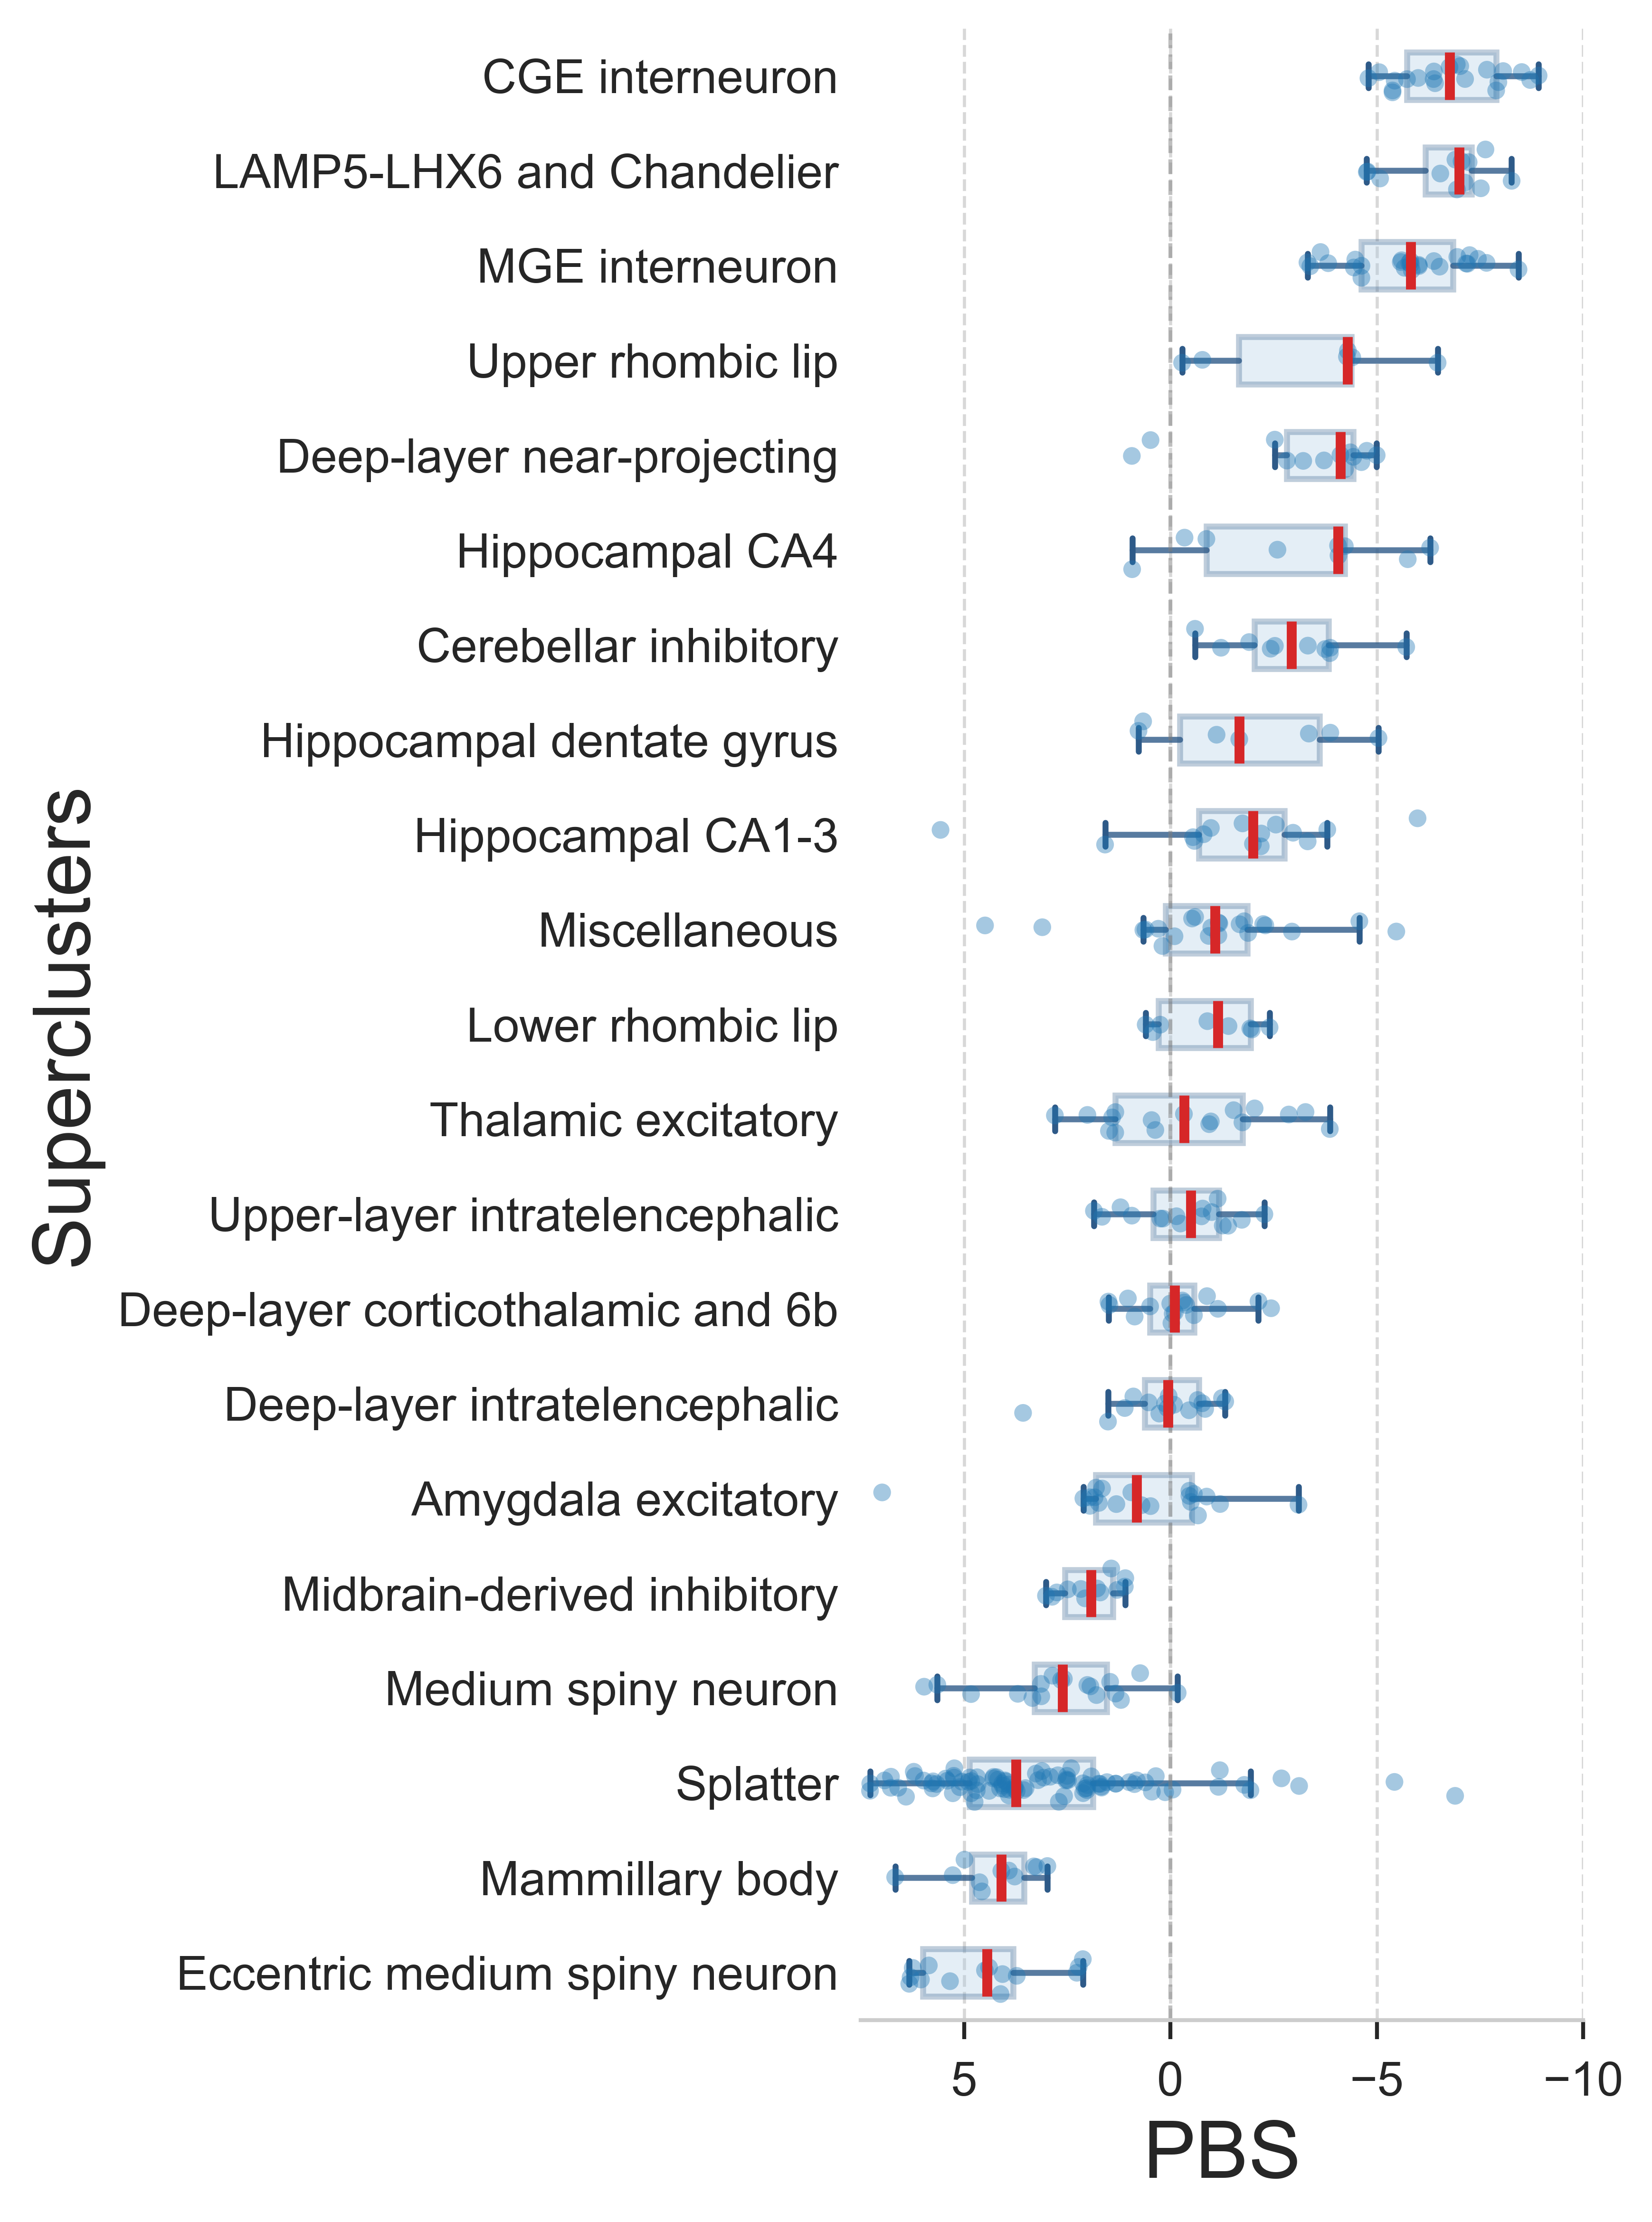

In [81]:
SuperClusterBias_BoxPlot_CorrIQ(HumanCT_res_df_GeneL, flip_axis=True, figsize=(6, 8))

/tmp/ipykernel_156976/3263561450.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(show_dat_Z2, labels=show_CTs, vert=False, patch_artist=False,


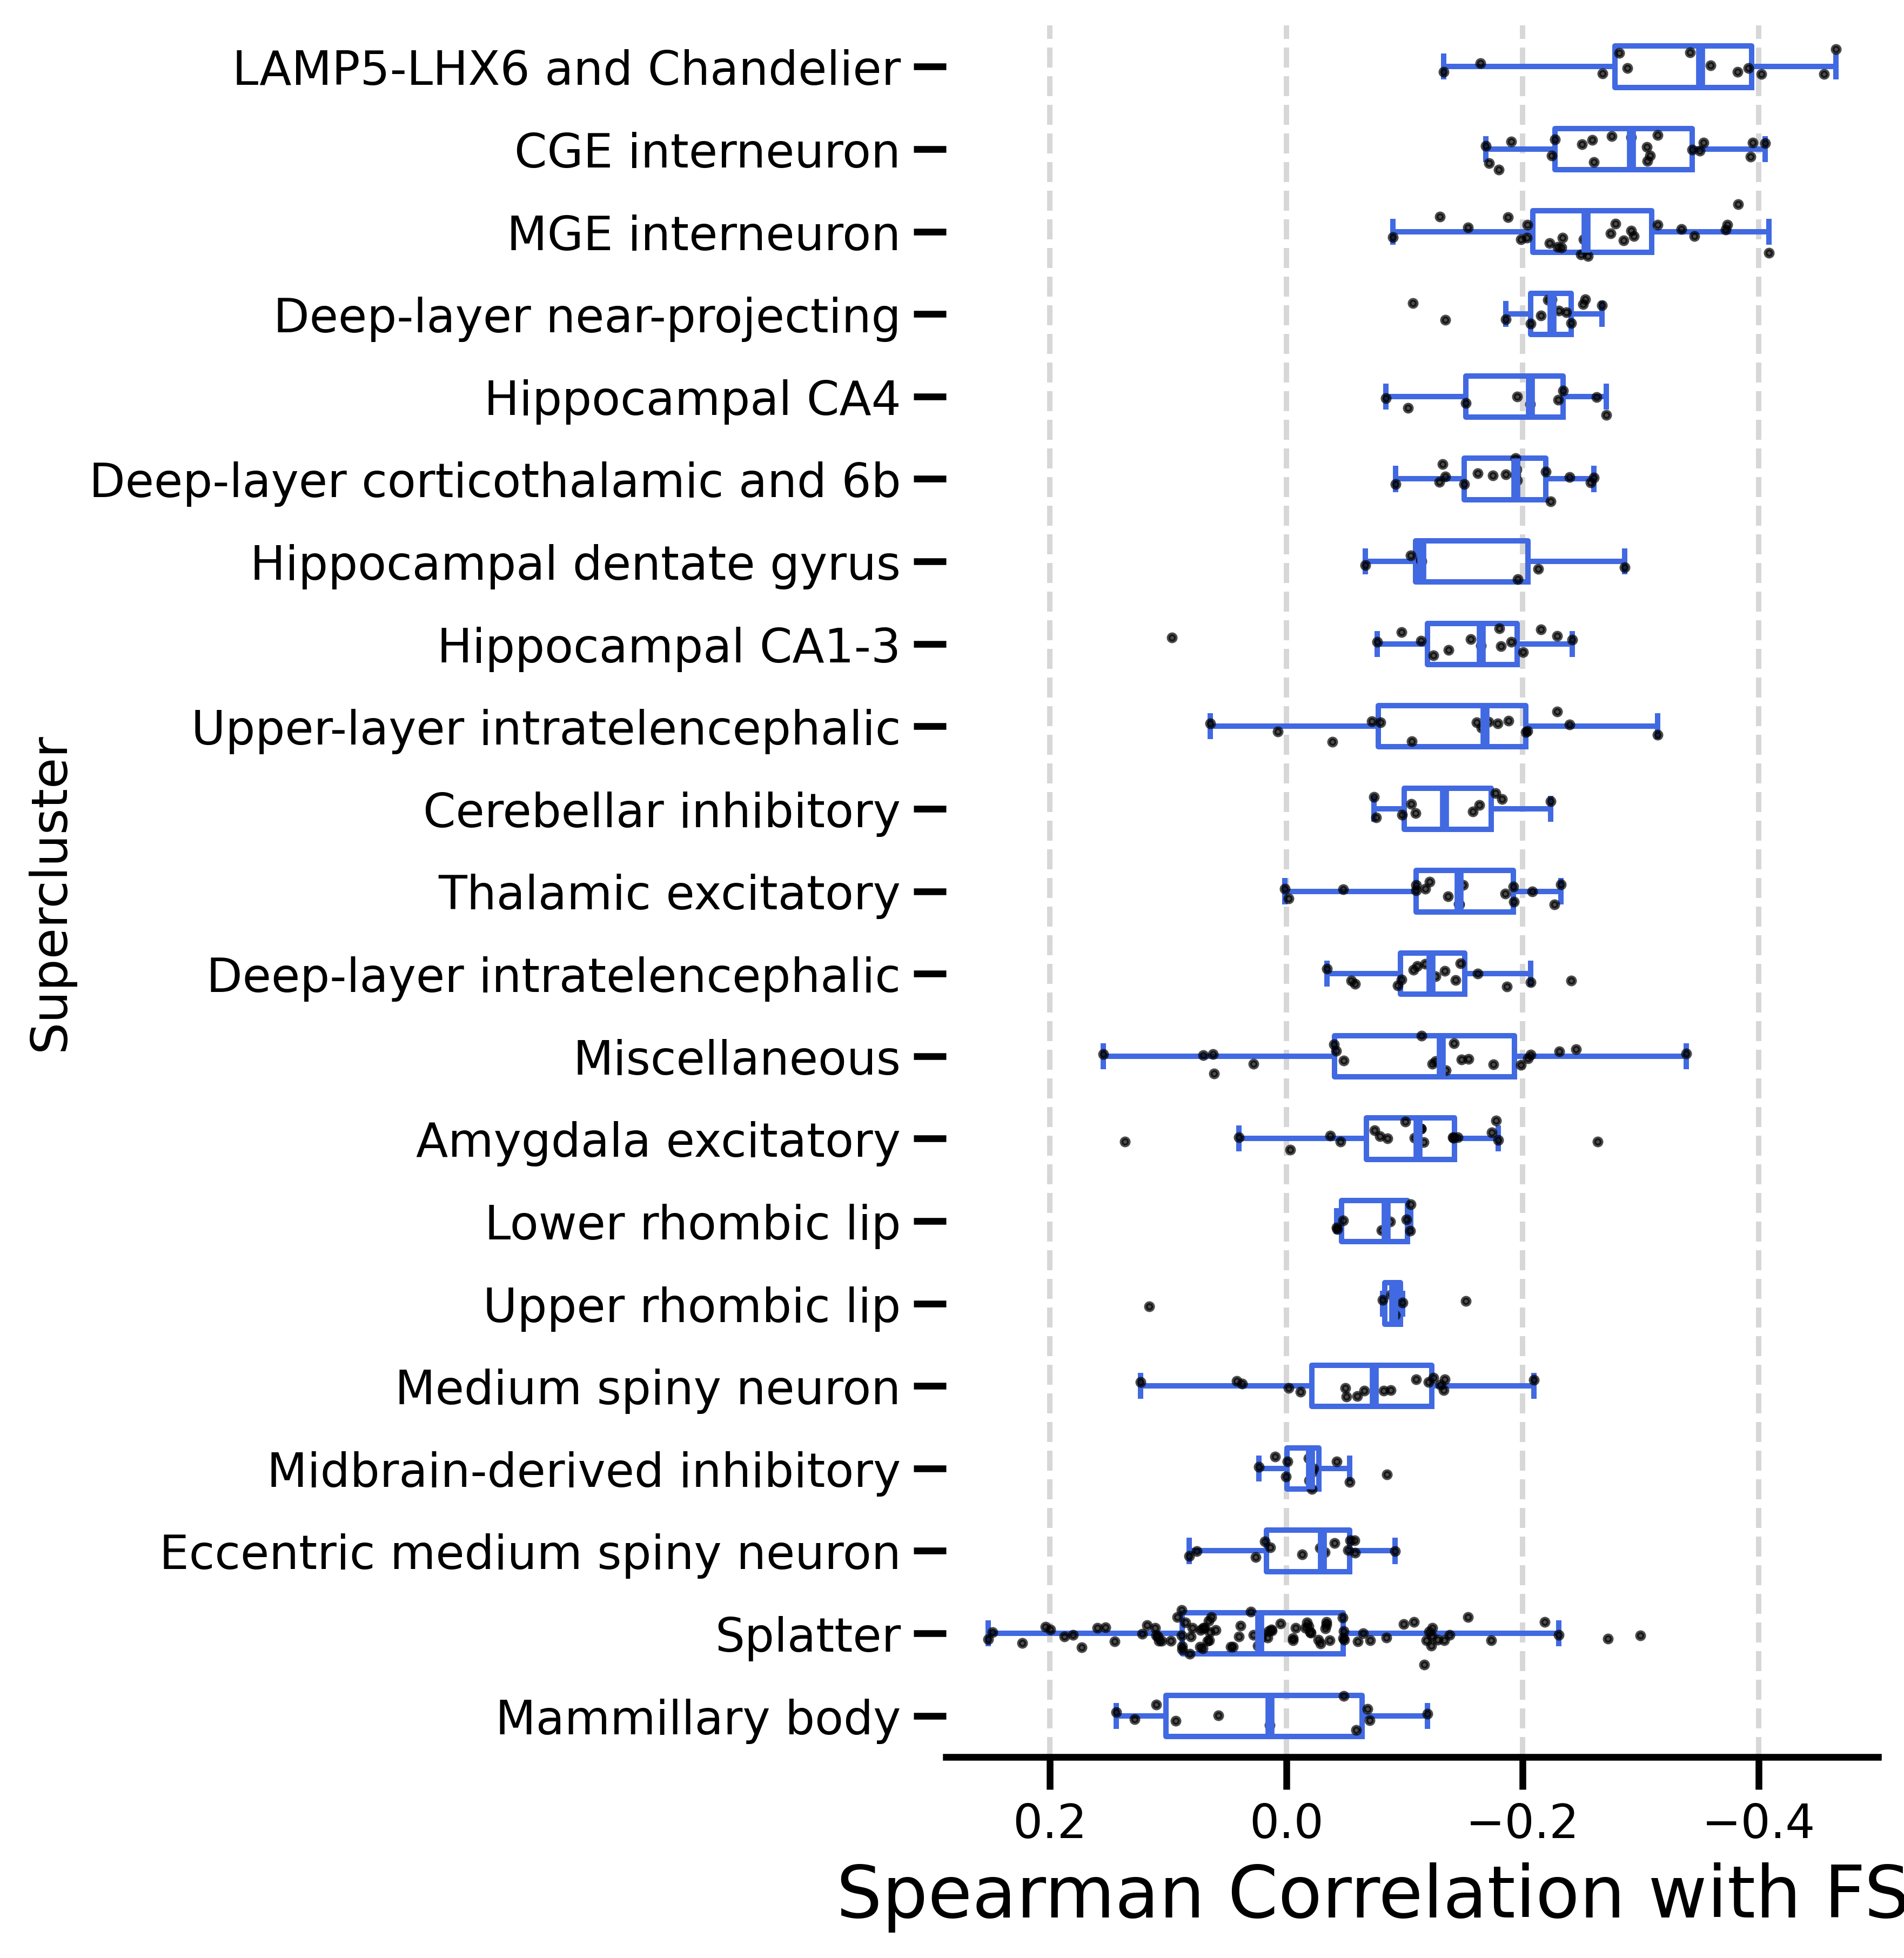

In [ ]:
SuperClusterBias_BoxPlot_CorrIQ(HumanCT_res_df_GeneL_spec, "FSIQ", flip_axis=True, plot_metric="SpearmanR", figsize=(8, 8))

In [ ]:
Anno.head(2)

Supercluster Class auto-annotation Neurotransmitter auto-annotation  \
0  Miscellaneous                 BCELL                                    
1  Miscellaneous                 TCELL                                    

  Neuropeptide auto-annotation Subtype auto-annotation Transferred MTG Label  \
0                                                                              
1                                                                              

                                   Top three regions  \
0  Midbrain: 21.0%, Basal forebrain: 19.0%, Pons:...   
1  Midbrain: 15.0%, Basal forebrain: 14.0%, Pons:...   

                               Top three dissections  \
0  Human GPi: 11.4%, Human SN: 11.4%, Human SN-RN...   
1  Human SpC: 8.2%, Human CbDN: 7.6%, Human SN: 7.4%   

                                  Top Enriched Genes  Number of cells  \
0  IGHM, MS4A1, FCRL1, AC244205.1, IGLL5, IGHA1, ...            105.0   
1  CD2, IL7R, PTPRC, SLFN12L, IL32, CCL5, GRAP2, ...           2474.0   

   DoubletFinder score    Total UMI  Fraction unspliced  \
0             0.013358  2258.866667            0.608113   
1             0.022371  2184.314470            0.582884   

   Fraction mitochondrial  H19.30.002  H19.30.001  H18.30.002  H18.30.001  \
0                0.020989        58.0        20.0        27.0         0.0   
1                0.021212       708.0       400.0      1364.0         2.0   

   Fraction cells from top donor  
0                       0.552381  
1                       0.551334

/tmp/ipykernel_156976/3263561450.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(show_dat_Z2, labels=show_CTs, vert=False, patch_artist=False,


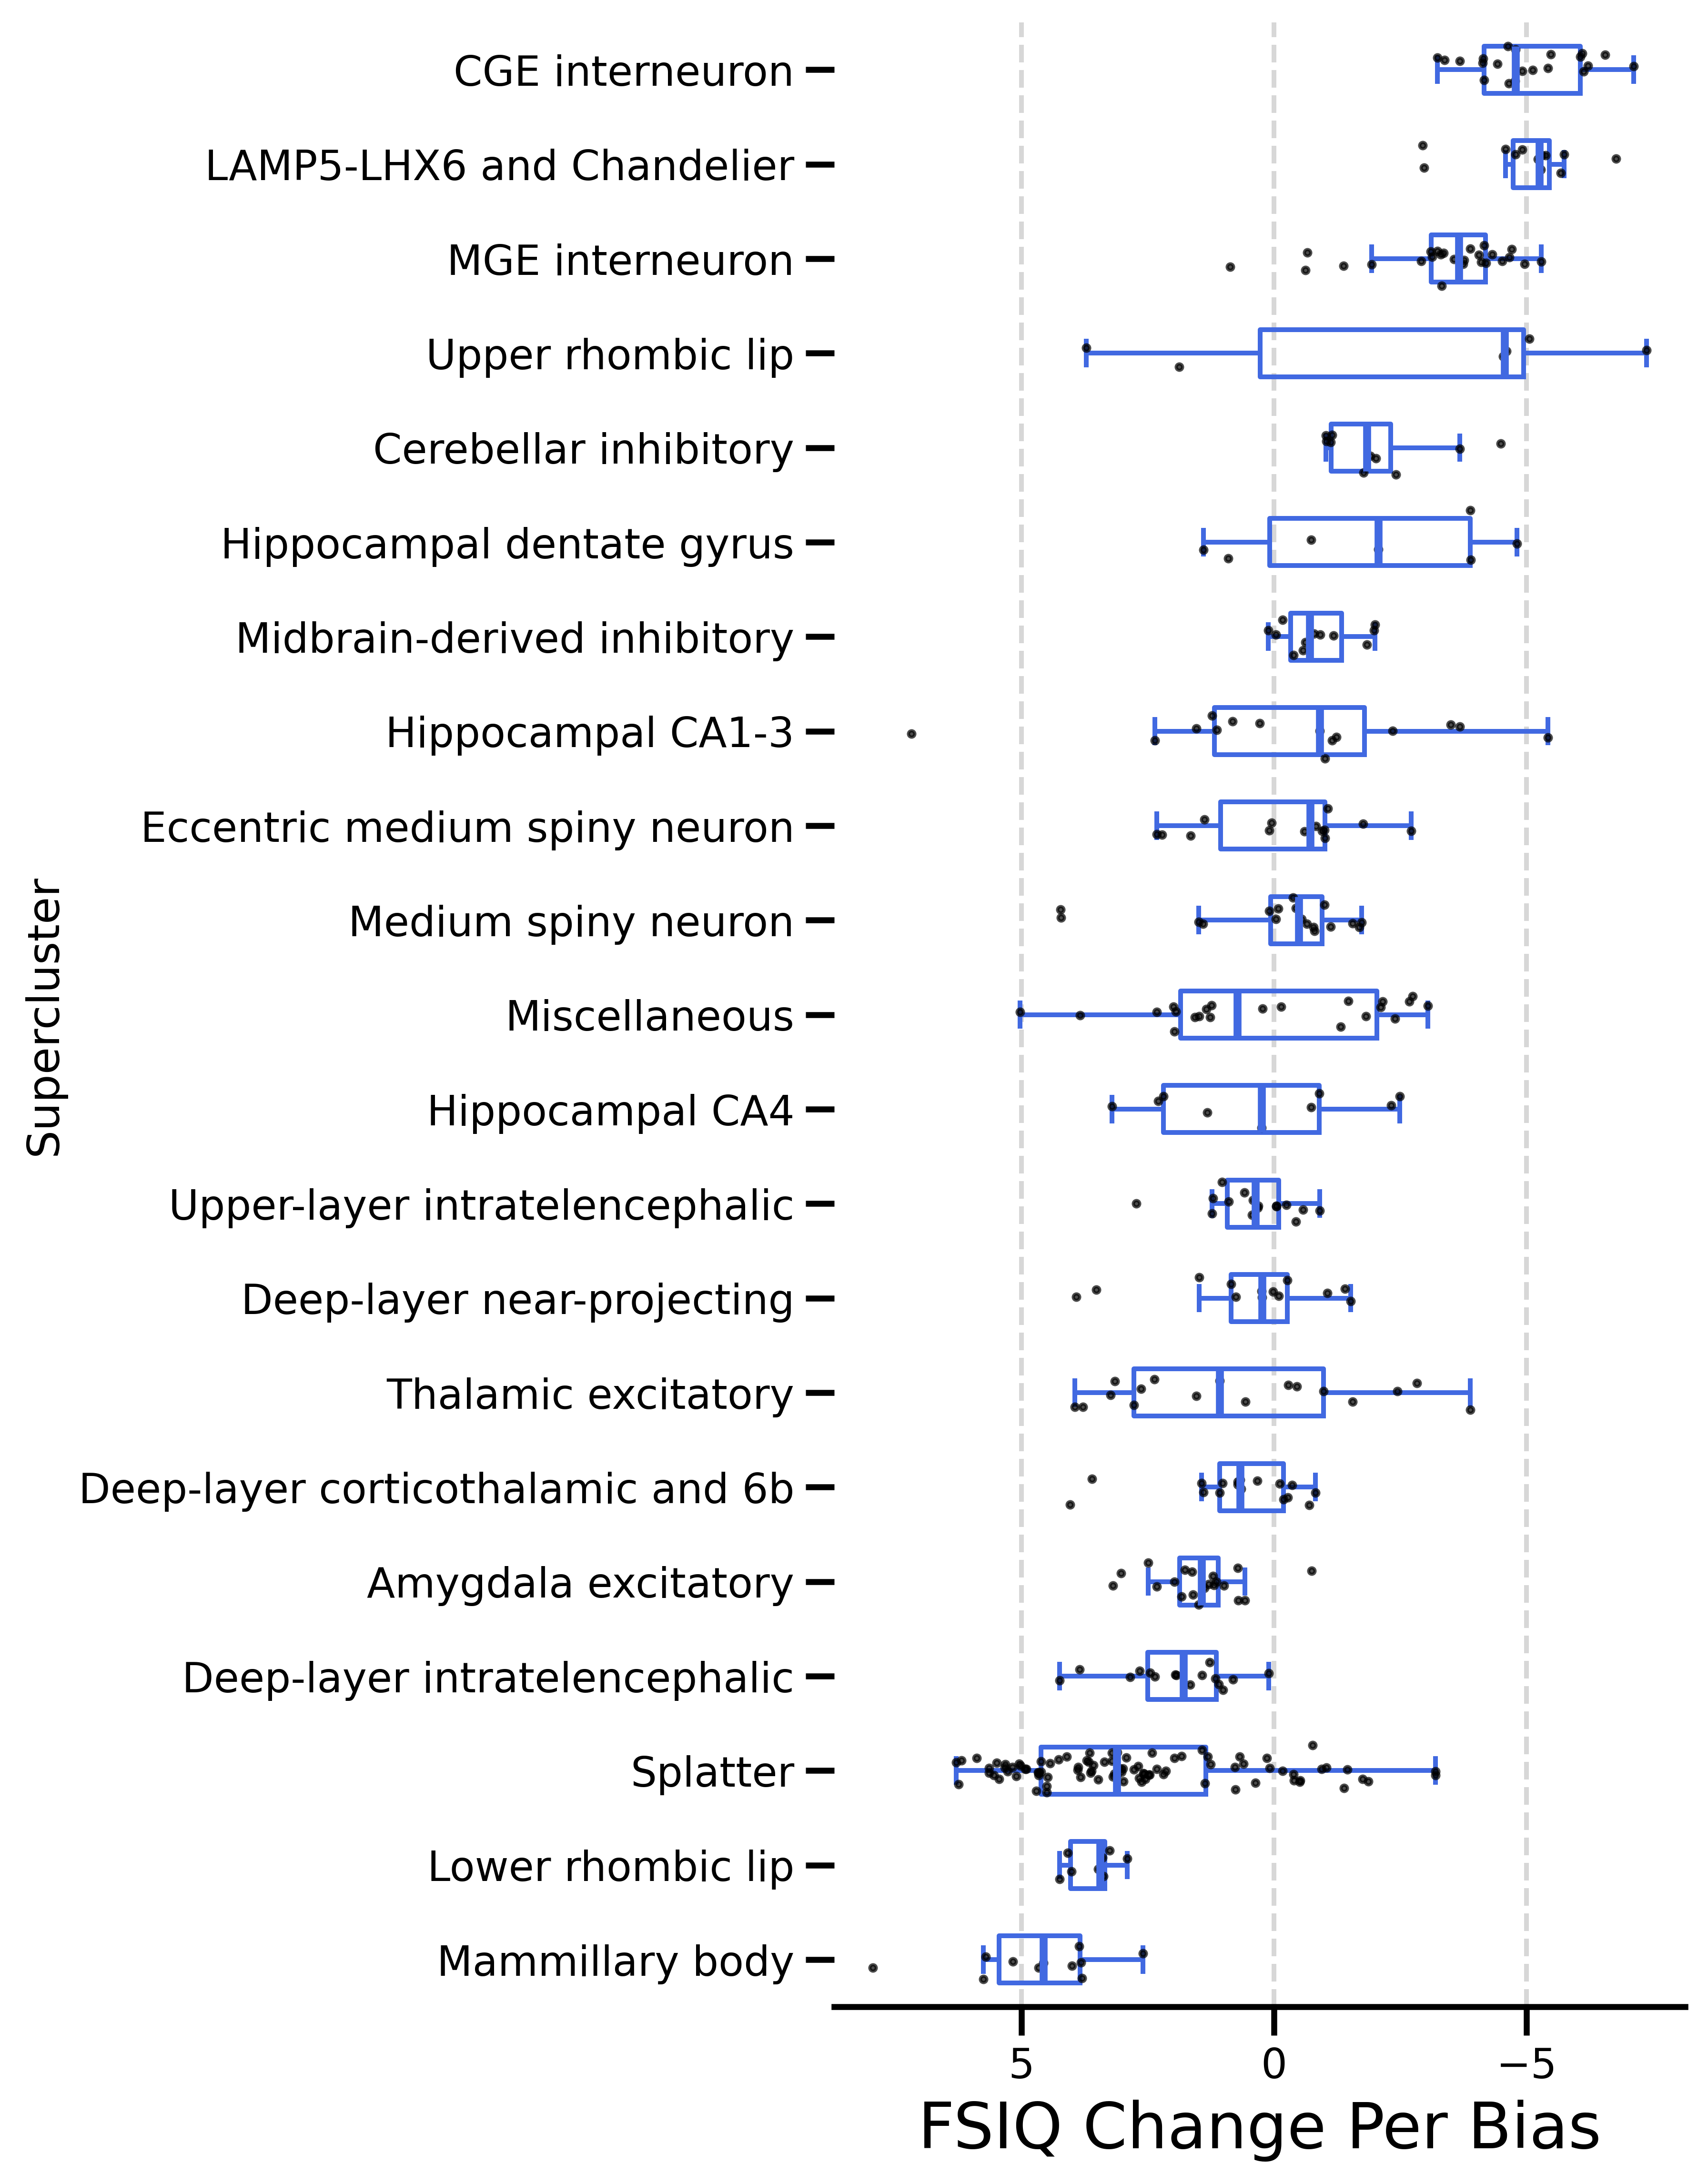

In [48]:
SuperClusterBias_BoxPlot_CorrIQ(HumanCT_res_df_MutL, "FSIQ", flip_axis=True)

/tmp/ipykernel_156976/3263561450.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(show_dat_Z2, labels=show_CTs, vert=False, patch_artist=False,


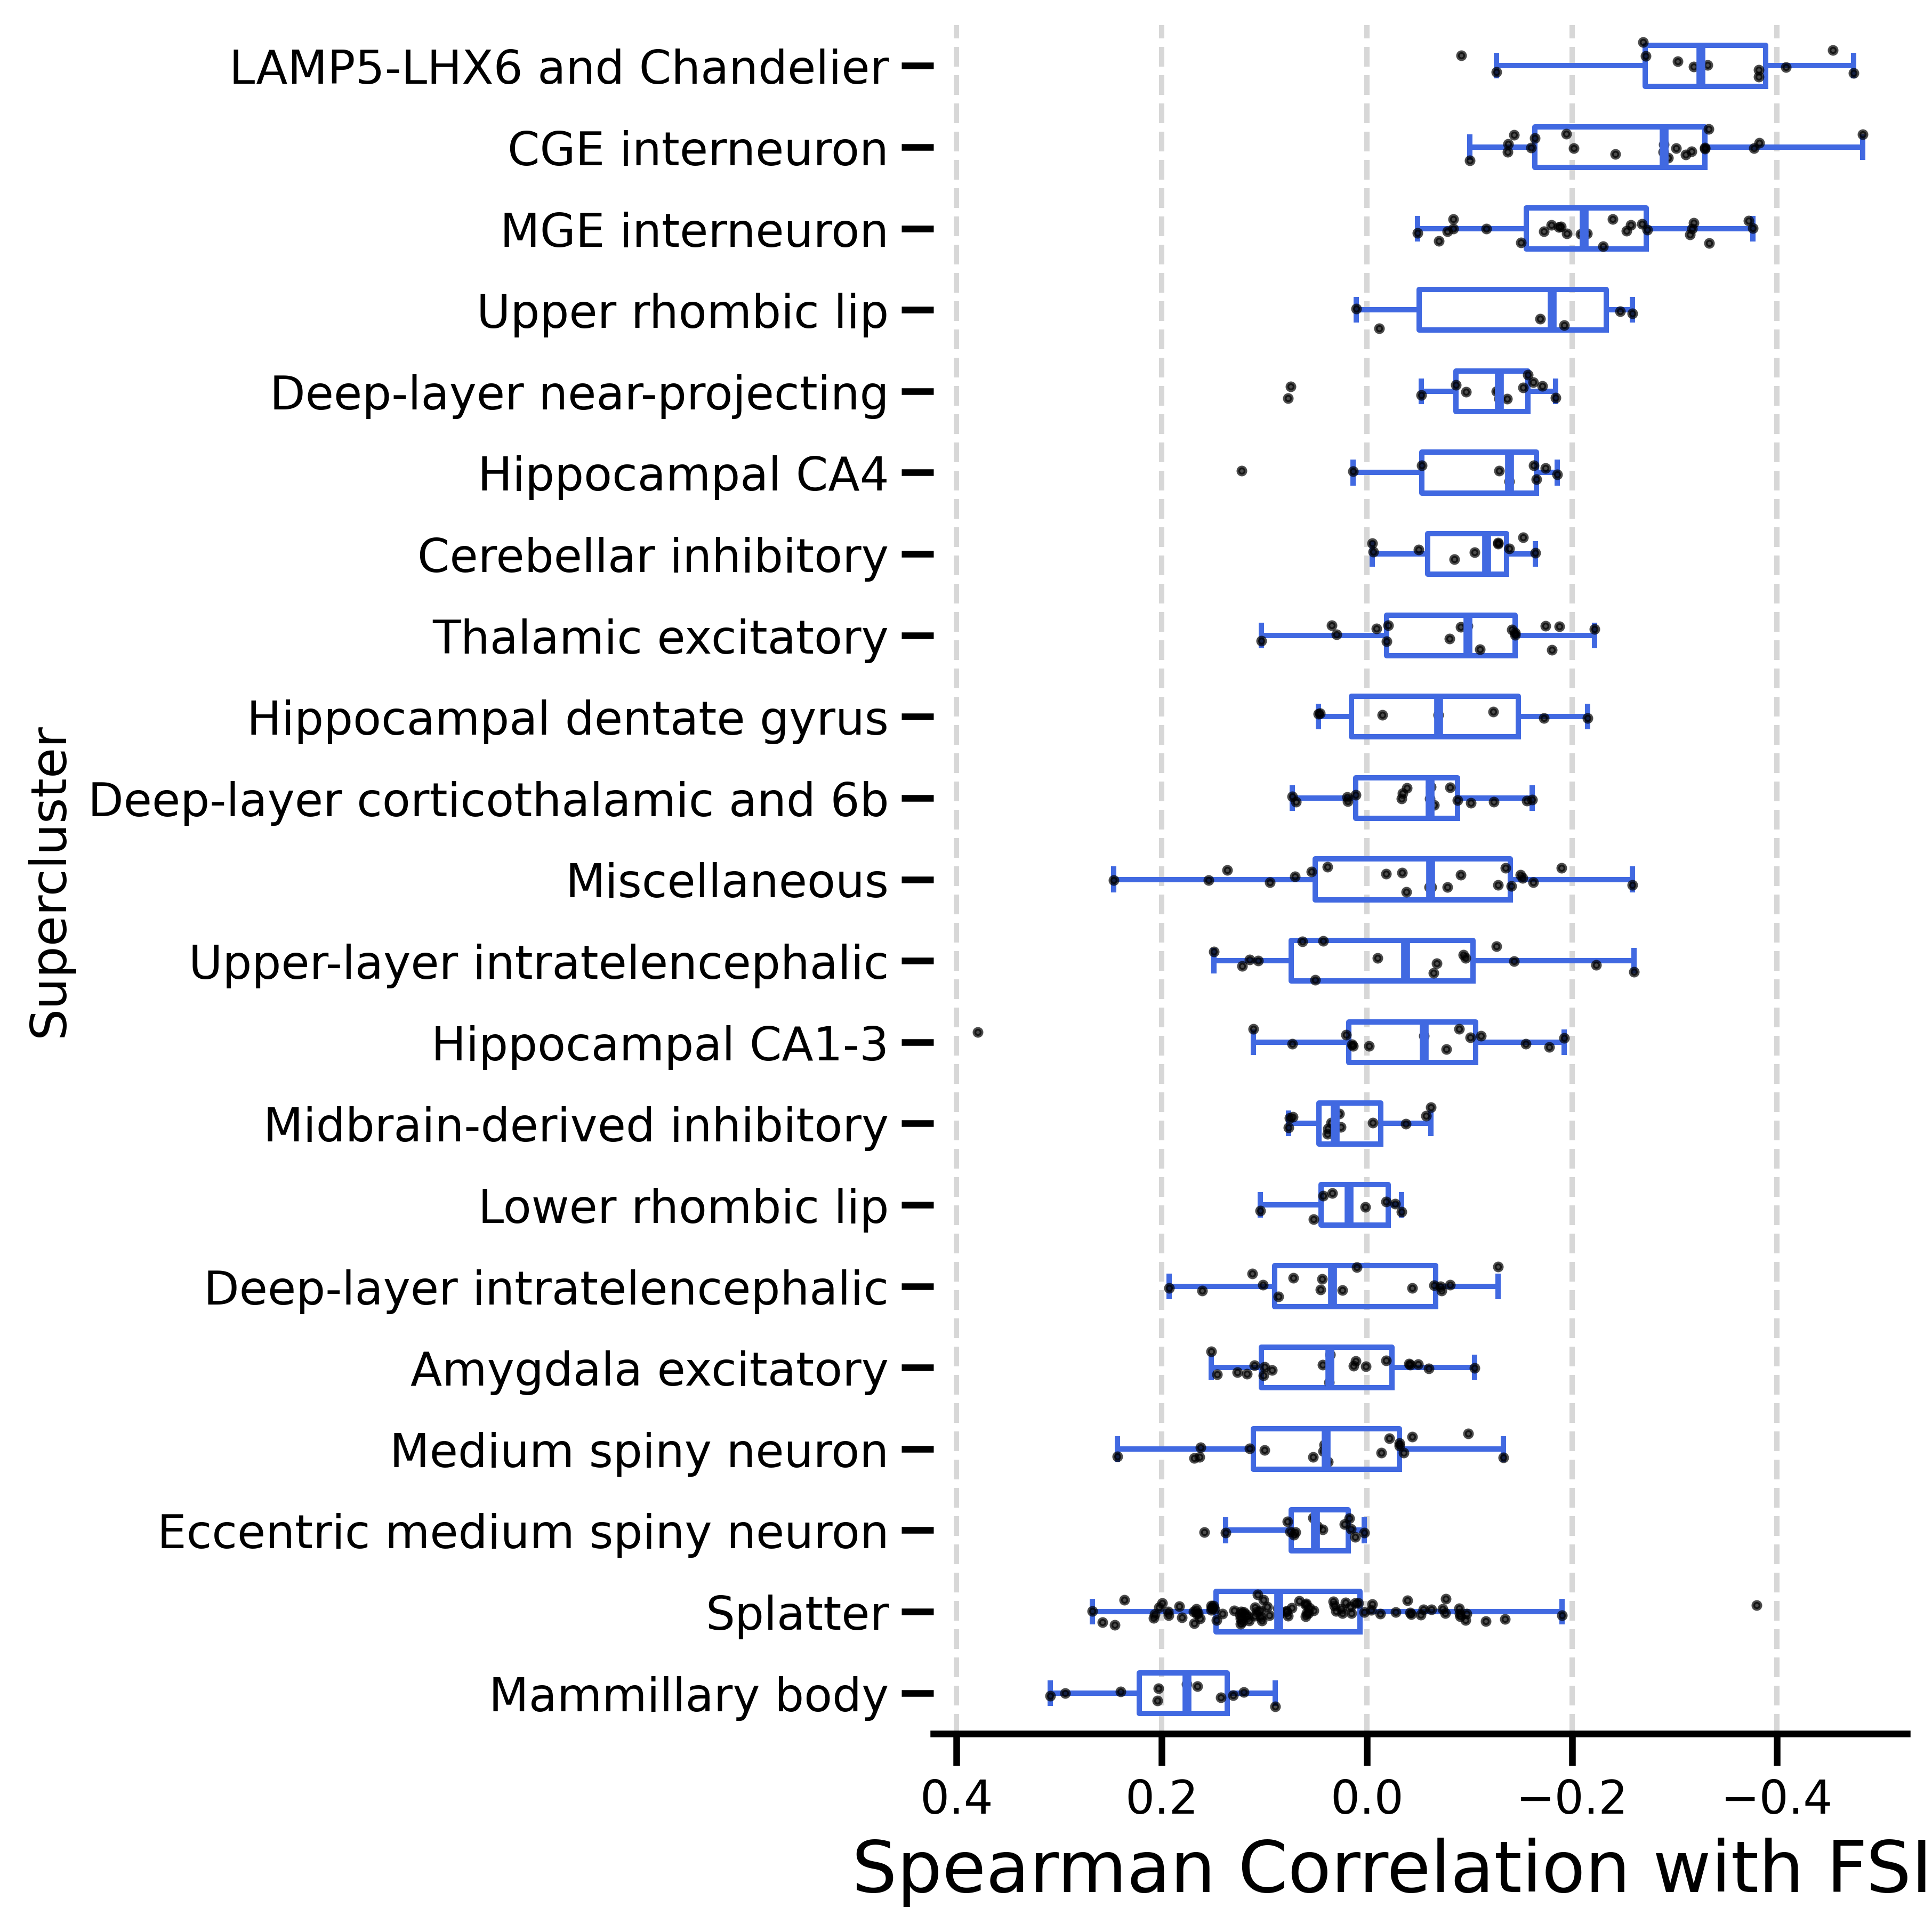

In [53]:
SuperClusterBias_BoxPlot_CorrIQ(HumanCT_res_df_GeneL, "FSIQ", flip_axis=True, plot_metric="SpearmanR", figsize=(8, 8))

In [60]:
# Apply FDR correction to SpearmanP and p_value columns
HumanCT_res_df_MutL = HumanCT_res_df_MutL.loc[Neuron_idx, :]
HumanCT_res_df_MutL.sort_values("SpearmanP")
HumanCT_res_df_MutL['SpearmanP_FDR'] = multipletests(HumanCT_res_df_MutL['SpearmanP'], method='fdr_bh')[1]
HumanCT_res_df_MutL['p_value_FDR'] = multipletests(HumanCT_res_df_MutL['p_value'], method='fdr_bh')[1]

In [64]:
(HumanCT_res_df_MutL.sort_values("SpearmanP_FDR")["SpearmanP_FDR"]<0.05).sum()

6

In [112]:
HumanCT_res_df_MutL.sort_values("SpearmanP_FDR").head(20)

CT               Supercluster  SpearmanR  SpearmanP  PearsonR  PearsonP  \
266  266  LAMP5-LHX6 and Chandelier  -0.276165   0.000031 -0.203221  0.002400   
115  115          Hippocampal CA1-3   0.271602   0.000043  0.204705  0.002226   
267  267  LAMP5-LHX6 and Chandelier  -0.264261   0.000070 -0.219956  0.000996   
276  276            CGE interneuron  -0.250800   0.000165 -0.179129  0.007597   
329  329            Mammillary body   0.233018   0.000478  0.194152  0.003761   
265  265  LAMP5-LHX6 and Chandelier  -0.231293   0.000528 -0.181628  0.006783   
342  342                   Splatter   0.212907   0.001454  0.198710  0.003008   
328  328            Mammillary body   0.211268   0.001585  0.205720  0.002113   
295  295            CGE interneuron  -0.211654   0.001553 -0.234362  0.000442   
294  294            CGE interneuron  -0.210074   0.001687 -0.238026  0.000357   
293  293            CGE interneuron  -0.209072   0.001778 -0.207441  0.001934   
296  296            CGE interneuron  -0.200008   0.002820 -0.229349  0.000590   
268  268  LAMP5-LHX6 and Chandelier  -0.203027   0.002423 -0.177772  0.008075   
264  264  LAMP5-LHX6 and Chandelier  -0.199671   0.002868 -0.171642  0.010583   
114  114              Miscellaneous   0.201410   0.002629  0.152980  0.022922   
316  316          Lower rhombic lip   0.195341   0.003550  0.152662  0.023212   
351  351                   Splatter   0.196268   0.003393  0.173680  0.009682   
269  269  LAMP5-LHX6 and Chandelier  -0.196671   0.003326 -0.185175  0.005760   
397  397                   Splatter   0.184536   0.005933  0.205783  0.002106   
338  338                   Splatter   0.183654   0.006180  0.188544  0.004919   

         beta     CI_low    CI_high  intercept   r_value   p_value   std_err  \
266 -5.736384  -9.417208  -2.055560  64.095599  0.041299  0.002400  1.867628   
115  7.175679   2.606144  11.745214  65.373099  0.041904  0.002226  2.318554   
267 -6.768691 -10.766598  -2.770784  65.142667  0.048381  0.000996  2.028514   
276 -5.121534  -8.867686  -1.375383  66.234676  0.032087  0.007597  1.900774   
329  5.708307   1.867222   9.549393  64.712223  0.037695  0.003761  1.948943   
265 -5.221265  -8.986060  -1.456470  63.959842  0.032989  0.006783  1.910234   
342  5.323392   1.826741   8.820043  65.329482  0.039486  0.003008  1.774179   
328  7.939860   2.909734  12.969985  64.126403  0.042321  0.002113  2.552255   
295 -7.120174 -11.053575  -3.186772  64.172547  0.054926  0.000442  1.995784   
294 -6.553264 -10.114496  -2.992031  64.766711  0.056657  0.000357  1.806948   
293 -6.060844  -9.867299  -2.254389  64.349426  0.043032  0.001934  1.931372   
296 -6.127610  -9.590936  -2.664284  64.538678  0.052601  0.000590  1.757270   
268 -5.276641  -9.166687  -1.386596  65.290864  0.031603  0.008075  1.973785   
264 -4.775558  -8.425942  -1.125174  63.407414  0.029461  0.010583  1.852183   
114  5.029505   0.702574   9.356435  64.834375  0.023403  0.022922  2.195458   
316  4.241612   0.584720   7.898504  65.662538  0.023306  0.023212  1.855485   
351  4.905709   1.201181   8.610237  66.059309  0.030165  0.009682  1.879655   
269 -5.674578  -9.685160  -1.663996  65.248298  0.034290  0.005760  2.034945   
397  5.882247   2.156869   9.607625  64.681873  0.042347  0.002106  1.890234   
338  5.488210   1.681138   9.295283  66.742263  0.035549  0.004919  1.931685   

     SpearmanP_FDR  p_value_FDR  
266       0.008170     0.088440  
115       0.008170     0.088440  
267       0.008880     0.088440  
276       0.015737     0.119833  
329       0.033628     0.095782  
265       0.033628     0.117769  
342       0.061735     0.088440  
328       0.061735     0.088440  
295       0.061735     0.075146  
294       0.061735     0.075146  
293       0.061735     0.088440  
296       0.073030     0.075146  
268       0.073030     0.119833  
264       0.073030     0.123926  
114       0.073030     0.138544  
316       0.075335     0.138544  
351       0.075335     0.123926  
269       0

In [113]:
# Apply FDR correction to SpearmanP and p_value columns
HumanCT_res_df_GeneL = HumanCT_res_df_GeneL.loc[Neuron_idx, :]
HumanCT_res_df_GeneL.sort_values("SpearmanP")
HumanCT_res_df_GeneL['SpearmanP_FDR'] = multipletests(HumanCT_res_df_GeneL['SpearmanP'], method='fdr_bh')[1]
HumanCT_res_df_GeneL['p_value_FDR'] = multipletests(HumanCT_res_df_GeneL['p_value'], method='fdr_bh')[1]


In [114]:
HumanCT_res_df_GeneL.sort_values("SpearmanP_FDR")

CT                   Supercluster  SpearmanR  SpearmanP  PearsonR  \
276  276                CGE interneuron  -0.483406   0.000161 -0.383471   
267  267      LAMP5-LHX6 and Chandelier  -0.474621   0.000219 -0.388152   
266  266      LAMP5-LHX6 and Chandelier  -0.454216   0.000438 -0.349157   
269  269      LAMP5-LHX6 and Chandelier  -0.382336   0.003638 -0.351124   
115  115              Hippocampal CA1-3   0.379465   0.003922  0.227578   
..   ...                            ...        ...        ...       ...   
426  426  Eccentric medium spiny neuron   0.002734   0.984043  0.107433   
334  334                       Splatter   0.002290   0.986636  0.041458   
183  183              Hippocampal CA1-3  -0.002427   0.985838 -0.049031   
318  318              Lower rhombic lip   0.001401   0.991822 -0.080589   
154  154            Amygdala excitatory   0.001060   0.993816  0.029427   

     PearsonP      beta     CI_low    CI_high  intercept   r_value   p_value  \
276  0.003530 -7.890700 -13.075557  -2.705843  65.417236  0.147050  0.003530   
267  0.003117 -8.264822 -13.618636  -2.911008  63.306980  0.150662  0.003117   
266  0.008352 -7.130584 -12.351728  -1.909440  62.166955  0.121910  0.008352   
269  0.007969 -7.630912 -13.182739  -2.079085  63.349542  0.123288  0.007969   
115  0.091635  5.568268  -0.932040  12.068575  63.207745  0.051792  0.091635   
..        ...       ...        ...        ...        ...       ...       ...   
426  0.430634  2.266527  -3.456079   7.989134  62.402772  0.011542  0.430634   
334  0.761606  0.870920  -4.855622   6.597462  62.687818  0.001719  0.761606   
183  0.719705 -0.980023  -6.426752   4.466707  63.005158  0.002404  0.719705   
318  0.554903 -1.934758  -8.463500   4.593985  62.180108  0.006495  0.554903   
154  0.829540  0.699913  -5.786435   7.186261  62.458351  0.000866  0.829540   

      std_err  SpearmanP_FDR  p_value_FDR  
276  2.586119       0.041879     0.221646  
267  2.670392       0.041879     0.221646  
266  2.604219       0.055710     0.221646  
269  2.769158       0.146903     0.221646  
115  3.242244       0.146903     0.360870  
..        ...            ...          ...  
426  2.854340       0.991828     0.741174  
334  2.856303       0.991828     0.918955  
183  2.716737       0.991828     0.915177  
318  3.256427       0.993816     0.821600  
154  3.235281       0.993816     0.937194  

[382 rows x 15 columns]

In [42]:
HumanCT_res_df_GeneL.head(5) # sort by beta

CT               Supercluster  SpearmanR  SpearmanP  PearsonR  PearsonP  \
276  276            CGE interneuron  -0.483406   0.000161 -0.383471  0.003530   
267  267  LAMP5-LHX6 and Chandelier  -0.474621   0.000219 -0.388152  0.003117   
266  266  LAMP5-LHX6 and Chandelier  -0.454216   0.000438 -0.349157  0.008352   
268  268  LAMP5-LHX6 and Chandelier  -0.408791   0.001760 -0.347801  0.008625   
294  294            CGE interneuron  -0.382575   0.003615 -0.405017  0.001959   

         beta     CI_low   CI_high  intercept   r_value   p_value   std_err  
276 -7.890700 -13.075557 -2.705843  65.417236  0.147050  0.003530  2.586119  
267 -8.264822 -13.618636 -2.911008  63.306980  0.150662  0.003117  2.670392  
266 -7.130584 -12.351728 -1.909440  62.166955  0.121910  0.008352  2.604219  
268 -7.223281 -12.535764 -1.910798  63.350994  0.120966  0.008625  2.649777  
294 -8.509932 -13.751209 -3.268655  63.199902  0.164039  0.001959  2.614261

In [12]:
IDs, names, supercluster, correlation, pvalues = [],[],[],[],[]
for Idx in Neuron_idx:
    biases, IQs = BiasVsPheno(Mut_n_IQ_conf, HCT_Z2_MAT_HCT , Idx, 'xx')
    pho, p = spearmanr(biases, IQs)
    #print(pho, p)
    IDs.append(Idx)
    names.append("{}- {}".format(Idx, Anno.loc[Idx, "Supercluster"]))
    supercluster.append(Anno.loc[Idx, "Supercluster"])
    correlation.append(pho)
    pvalues.append(p)
human_ct_res_df_mutL = pd.DataFrame(data={"ID":IDs, "CT":names, "Supercluster":supercluster, "SpearmanR":correlation, "p":pvalues})
human_ct_res_df_mutL = human_ct_res_df_mutL.set_index("ID")
human_ct_res_df_mutL = human_ct_res_df_mutL.sort_values("SpearmanR")
human_ct_res_df_mutL = ADJ_P(human_ct_res_df_mutL)
human_ct_res_df_mutL = AnnotateCTDat(human_ct_res_df_mutL, Anno)
#human_ct_res_df_mutL.to_csv("../dat/Pheno_Bias_vs_IQ/HumanCT.mutL.csv")

In [50]:
IDs, names, supercluster, correlation, pvalues = [],[],[],[],[]
for Idx in Neuron_idx:
    biases, IQs = BiasVsPheno(Avg_Gene_IQ_DF, HCT_Z2_MAT_HCT , Idx, 'xx')
    pho, p = spearmanr(biases, IQs)
    #print(pho, p)
    IDs.append(Idx)
    names.append("{}- {}".format(Idx, Anno.loc[Idx, "Supercluster"]))
    supercluster.append(Anno.loc[Idx, "Supercluster"])
    correlation.append(pho)
    pvalues.append(p)
human_ct_res_df_geneL = pd.DataFrame(data={"ID":IDs, "CT":names, "Supercluster":supercluster, "SpearmanR":correlation, "p":pvalues})
human_ct_res_df_geneL = human_ct_res_df_geneL.set_index("ID")
human_ct_res_df_geneL = human_ct_res_df_geneL.sort_values("SpearmanR")
human_ct_res_df_geneL = ADJ_P(human_ct_res_df_geneL)
human_ct_res_df_geneL = AnnotateCTDat(human_ct_res_df_geneL, Anno)

In [51]:
human_ct_res_df_geneL.head(10)

CT               Supercluster  SpearmanR  \
266  266- LAMP5-LHX6 and Chandelier  LAMP5-LHX6 and Chandelier  -0.456415   
267  267- LAMP5-LHX6 and Chandelier  LAMP5-LHX6 and Chandelier  -0.455923   
276            276- CGE interneuron            CGE interneuron  -0.438480   
268  268- LAMP5-LHX6 and Chandelier  LAMP5-LHX6 and Chandelier  -0.397194   
265  265- LAMP5-LHX6 and Chandelier  LAMP5-LHX6 and Chandelier  -0.391288   
294            294- CGE interneuron            CGE interneuron  -0.363877   
269  269- LAMP5-LHX6 and Chandelier  LAMP5-LHX6 and Chandelier  -0.361354   
237                   237- Splatter                   Splatter  -0.359385   
239            239- MGE interneuron            MGE interneuron  -0.353171   
259            259- MGE interneuron            MGE interneuron  -0.349356   

            p     p_adj Class         Subtype Neurotransmitter  \
266  0.000317  0.061576  NEUR           CHAND             GABA   
267  0.000322  0.061576  NEUR  INT-LAMP5-LHX6      GABA VGLUT3   
276  0.000576  0.073313  NEUR         INT-VIP      GABA VGLUT3   
268  0.002021  0.182442  NEUR  INT-LAMP5-LHX6             GABA   
265  0.002388  0.182442  NEUR           CHAND             GABA   
294  0.004988  0.267142  NEUR         INT-VIP             GABA   
269  0.005321  0.267142  NEUR  INT-LAMP5-LHX6             GABA   
237  0.005595  0.267142  NEUR         INT-SST             GABA   
239  0.006541  0.274612  NEUR         INT-SST             GABA   
259  0.007189  0.274612  NEUR       INT-PVALB             GABA   

                                     Top three regions  \
266  Amygdala: 42.8%, Hippocampus: 27.1%, Cerebral ...   
267  Hippocampus: 80.6%, Cerebral cortex: 13.8%, Am...   
276  Hippocampus: 73.7%, Amygdala: 13.0%, Cerebral ...   
268  Hippocampus: 95.5%, Cerebral cortex: 2.4%, Amy...   
265  Cerebral cortex: 72.8%, Amygdala: 17.1%, Hippo...   
294  Cerebral cortex: 64.4%, Hippocampus: 14.7%, Am...   
269  Cerebral cortex: 43.7%, Hippocampus: 25.7%, Am...   
237  Amygdala: 57.4%, Cerebral cortex: 20.2%, Basal...   
239  Cerebral cortex: 95.4%, Hippocampus: 1.5%, Bas...   
259  Cerebral cortex: 89.3%, Amygdala: 3.4%, Hippoc...   

                                 Top three dissections  Number of cells  \
266   Human CMN: 12.5%, Human BL: 8.8%, Human La: 8.4%           3566.0   
267  Human CA4C-DGC: 23.2%, Human CA1U-CA2U-CA3U: 1...           1018.0   
276  Human CA3R: 12.6%, Human CA4C-DGC: 12.2%, Huma...           2080.0   
268  Human CA1U-CA2U-CA3U: 17.8%, Human CA3R: 17.6%...           3843.0   
265   Human MEC: 6.1%, Human M1C: 4.8%, Human BL: 4.2%           4251.0   
294  Human MEC: 5.3%, Human M1C: 5.2%, Human Cla: 4.7%          14134.0   
269  Human MEC: 8.5%, Human CMN: 6.9%, Human CA1U-C...           3214.0   
237  Human BL: 16.0%, Human CMN: 13.9%, Human CEN: ...           2234.0   
239  Human M1C: 10.0%, Human MTG: 6.9%, Human A29-A...           6114.0   
259  Human MTG: 6.4%, Human M1C: 6.3%, Human A43: 4.0%          17841.0   

                          Neuropeptide auto-annotation  
266  CCK CHGA CHGB CRH IGF NAMPT NPPC NUCB NXPH PTH...  
267  CCK CHGA CHGB CORT IGF NAMPT NPPC NPW NUCB NXP...  
276  CCK CHGA CHGB GRP IGF NAMPT NPY NUCB NXPH PNOC...  
268  CCK CHGA CHGB CORT IGF NAMPT NPPC NUCB NXPH SC...  
265  CBLN CCK CHGA CHGB CRH IGF NAMPT NPPC NUCB NXP...  
294  CBLN CCK CHGA CHGB CRH IGF NAMPT NPPC NUCB PTH...  
269  CCK CHGA CHGB IGF NAMPT NPPC NUCB NXPH PNOC SC...  
237  CCK CHGA CHGB CORT IGF NAMPT NMU NPPC NUCB NXP...  
239  CCK CHGA CHGB CORT IGF NAMPT NMU NPPC NUCB NXP...  
259  CBLN CCK CHGA CHGB CORT IGF NAMPT NMU NPPC NUC...

In [65]:
def SuperClusterBias_BoxPlot_CorrIQ(DF1, label="RT", flip_axis=True):
    dat_Z2 = []
    mean_Z2 = []
    for _CT in Neurons:
        tmp = DF1[DF1["Supercluster"] == _CT]
        dat_Z2.append(tmp["SpearmanR"].values)
        mean_Z2.append(np.mean(tmp["SpearmanR"].values))
    mean_Z2 = np.array(mean_Z2)

    # Sorting data by the mean values
    if flip_axis:
        sort_idx = np.argsort(mean_Z2)[::-1]  # Reverse the sorting order
    else:
        sort_idx = np.argsort(mean_Z2)
    show_dat_Z2 = [dat_Z2[x] for x in sort_idx]
    show_CTs = [ALL_CTs[x] for x in sort_idx]

    # Create a figure and axis
    fig, ax = plt.subplots(dpi=480, figsize=(8, 10))

    # Customize the boxplot to only show the edges with the same color
    boxprops = dict(linestyle='-', linewidth=1.5, color='royalblue')
    medianprops = dict(linestyle='-', linewidth=2.5, color='royalblue')
    whiskerprops = dict(color='royalblue', linewidth=1.5)
    capprops = dict(color='royalblue', linewidth=1.5)
    flierprops = dict(marker='', color='royalblue', alpha=0.5)  # Adjusted to not show outliers

    # Use Seaborn to set the context for publication-quality plots
    sns.set_context("talk", font_scale=1.2)

    # Draw the boxplot
    bp = ax.boxplot(show_dat_Z2, labels=show_CTs, vert=False, patch_artist=False,
                    boxprops=boxprops, medianprops=medianprops, 
                    whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)

    # Overlay each data point on the boxplot
    for i in range(len(show_dat_Z2)):
        y = np.random.normal(i + 1, 0.1, size=len(show_dat_Z2[i]))  # jitter for better visibility
        ax.plot(show_dat_Z2[i], y, 'o', markersize=2, color='black', alpha=0.7)

    # Add grid lines
    ax.grid(True, axis='x', linestyle='--', alpha=0.6)

    # Add labels and title
    ax.set_xlabel("{}-Bias Correlation".format(label), fontsize=20)
    ax.set_ylabel("Supercluster", fontsize=14)

    # Flip the x-axis
    if flip_axis:
        ax.invert_xaxis()

    # Adjust the tick parameters for better readability
    ax.tick_params(axis='both', which='major', labelsize=13, grid_alpha=0.5)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    # Show the plot
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_356778/1493996997.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(show_dat_Z2, labels=show_CTs, vert=False, patch_artist=False,


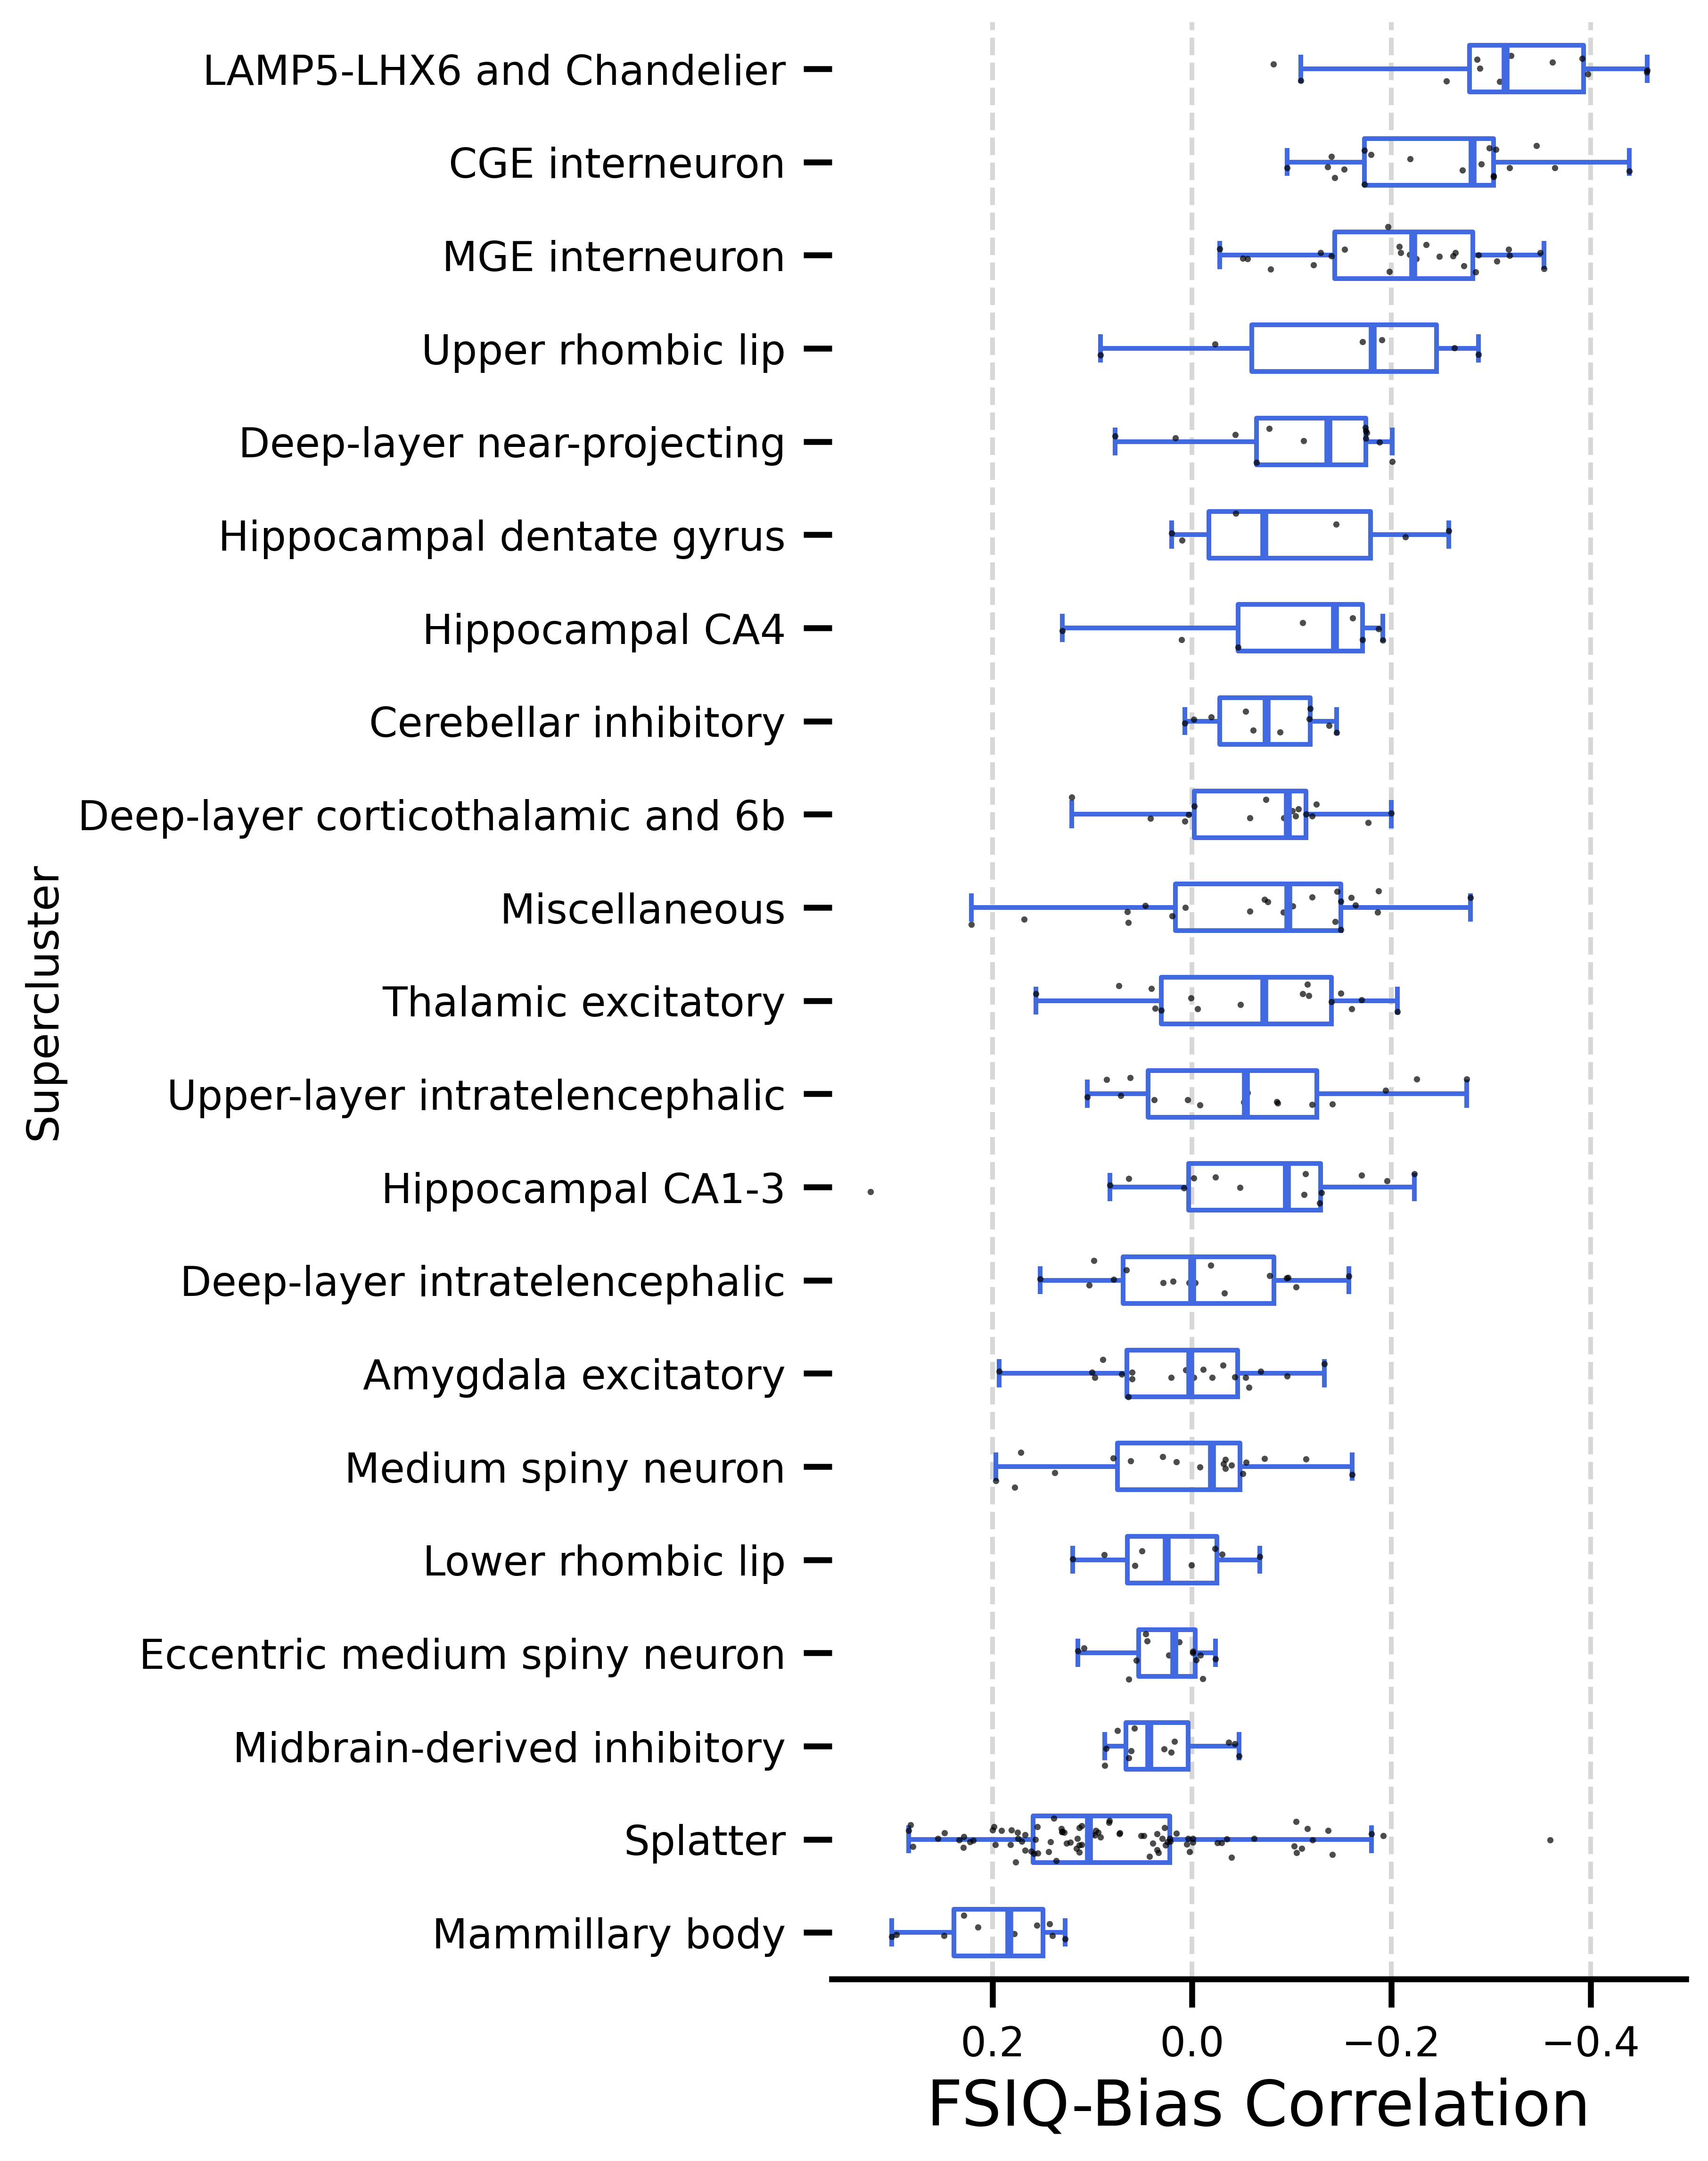

In [66]:
SuperClusterBias_BoxPlot_CorrIQ(human_ct_res_df_geneL, "FSIQ", flip_axis=True)

### Mut IQ permutation

In [166]:
Perm_DIR = "/home/jw3514/Work/CellType_Psy/dat/Pheno_Bias_vs_IQ/IQ_Permuts/HumanCT/ALL/"
Perm_DFs = []
for df in os.listdir(Perm_DIR):
    df = pd.read_csv(f"{Perm_DIR}/{df}", index_col=0)
    df.index = df.index.astype(int)
    Perm_DFs.append(df)
print(len(Perm_DFs))


10000


In [167]:
def plot_null_distributions(HumanCT_res_df_GeneL, Perm_DFs, CT=276, plot=False):
    """
    Plot null distributions of Rho and Beta values compared to observed values for a given cell type.
    
    Parameters:
    -----------
    HumanCT_res_df_GeneL : pandas DataFrame
        DataFrame containing observed results
    Perm_DFs : list
        List of DataFrames containing permutation results
    CT : int
        Cell type ID to analyze (default: 276)
    """
    Obs_Rho = HumanCT_res_df_GeneL.loc[CT, "SpearmanR"]
    Obs_Beta = HumanCT_res_df_GeneL.loc[CT, "beta"]
    
    Null_Rho = []
    Null_Beta = []
    for df in Perm_DFs:
        Null_Rho.append(df.loc[CT, "SpearmanR"])
        Null_Beta.append(df.loc[CT, "beta"])
    Null_Rho = np.array(Null_Rho)
    Null_Beta = np.array(Null_Beta)
    # Calculate p-values
    p_rho = (Null_Rho <= Obs_Rho).mean()
    p_beta = (Null_Beta <= Obs_Beta).mean()
    
    if plot:
        # Create plots comparing observed values to null distributions
        plt.figure(figsize=(10,5))

        # Plot Rho distribution and observed value
        plt.subplot(121)
        plt.hist(Null_Rho, bins=20, alpha=0.5)
        plt.axvline(x=Obs_Rho, color='red', linestyle='--', label='Observed')
        plt.xlabel('Rho')
        plt.ylabel('Count')
        plt.text(0.60, 0.60, f'p_rho = {p_rho:.2e}', transform=plt.gca().transAxes, fontsize=12, ha='right', va='top')
        plt.title('Rho: Null Distribution vs Observed')
        plt.legend()

        # Plot Beta distribution and observed value  
        plt.subplot(122)
        plt.hist(Null_Beta, bins=20, alpha=0.5)
        plt.axvline(x=Obs_Beta, color='red', linestyle='--', label='Observed')
        plt.xlabel('Beta')
        plt.ylabel('Count')
        plt.title('Beta: Null Distribution vs Observed')
        plt.legend()
    # annotate p-values

        plt.text(0.60, 0.60, f'p_beta = {p_beta:.2e}', transform=plt.gca().transAxes, fontsize=12, ha='right', va='top')
        plt.tight_layout()
        plt.show()
    
    return p_rho, p_beta

def plot_null_suptercluster_distributions(ClusterIdx, HumanCT_res_df_GeneL, Perm_DFs, plot=False):

    Obs_Rho = HumanCT_res_df_GeneL.loc[ClusterIdx, "SpearmanR"].mean()
    Obs_Beta = HumanCT_res_df_GeneL.loc[ClusterIdx, "beta"].mean()
    

    Null_Rho = []
    Null_Beta = []
    for df in Perm_DFs:
        Null_Rho.append(df.loc[ClusterIdx, "SpearmanR"].mean())
        Null_Beta.append(df.loc[ClusterIdx, "beta"].mean())
    Null_Rho = np.array(Null_Rho)
    Null_Beta = np.array(Null_Beta)
    # Calculate p-values
    p_rho = (Null_Rho <= Obs_Rho).mean()
    p_beta = (Null_Beta <= Obs_Beta).mean()

    
    if plot:
        # Create plots comparing observed values to null distributions
        plt.figure(figsize=(10,5))

        # Plot Rho distribution and observed value
        plt.subplot(121)
        plt.hist(Null_Rho, bins=20, alpha=0.5)
        plt.axvline(x=Obs_Rho, color='red', linestyle='--', label='Observed')
        plt.xlabel('Rho')
        plt.ylabel('Count')
        plt.text(0.60, 0.60, f'p_rho = {p_rho:.2e}', transform=plt.gca().transAxes, fontsize=12, ha='right', va='top')
        plt.title('Rho: Null Distribution vs Observed')
        plt.legend()

        # Plot Beta distribution and observed value  
        plt.subplot(122)
        plt.hist(Null_Beta, bins=20, alpha=0.5)
        plt.axvline(x=Obs_Beta, color='red', linestyle='--', label='Observed')
        plt.xlabel('Beta')
        plt.ylabel('Count')
        plt.title('Beta: Null Distribution vs Observed')
        plt.legend()
    # annotate p-values

        plt.text(0.60, 0.60, f'p_beta = {p_beta:.2e}', transform=plt.gca().transAxes, fontsize=12, ha='right', va='top')
        plt.tight_layout()
        plt.show()
    
    return p_rho, p_beta

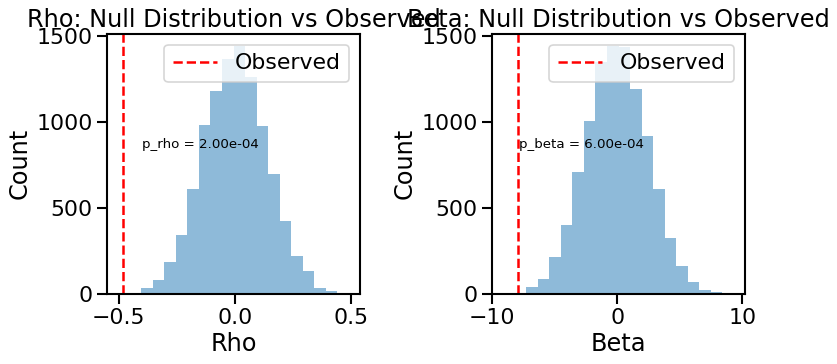

(0.0002, 0.0006)

In [168]:
plot_null_distributions(HumanCT_res_df_GeneL, Perm_DFs, CT=276, plot=True)

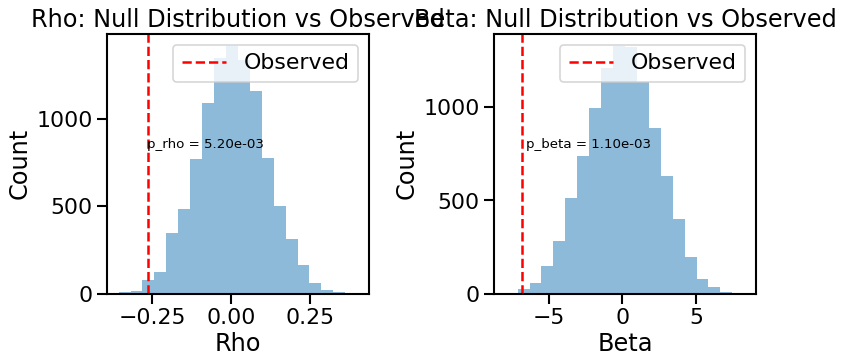

In [169]:
Supercluster = "CGE interneuron"
ClusterIdx = Anno[Anno["Supercluster"]==Supercluster].index.values

p_rho, p_beta = plot_null_suptercluster_distributions(ClusterIdx, HumanCT_res_df_GeneL, Perm_DFs, plot=True)

In [170]:
#Supercluster = "CGE interneuron"
# Create DataFrame to store results
results_df = pd.DataFrame(columns=['Supercluster', 'p_rho', 'p_beta'])

for Supercluster in Neurons:
    ClusterIdx = Anno[Anno["Supercluster"]==Supercluster].index.values
    p_rho, p_beta = plot_null_suptercluster_distributions(ClusterIdx, HumanCT_res_df_GeneL, Perm_DFs, plot=False)
    
    # Add results to DataFrame
    results_df = results_df.append({
        'Supercluster': Supercluster,
        'p_rho': p_rho,
        'p_beta': p_beta
    }, ignore_index=True)

/tmp/ipykernel_156976/3502618703.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_156976/3502618703.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_156976/3502618703.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_156976/3502618703.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_156976/3502618703.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

In [171]:
# Add FDR corrected p-values
results_df['p_rho_FDR'] = multipletests(results_df['p_rho'], method='fdr_bh')[1]
results_df['p_beta_FDR'] = multipletests(results_df['p_beta'], method='fdr_bh')[1]

results_df.sort_values("p_beta")

Supercluster   p_rho  p_beta  p_rho_FDR  p_beta_FDR
1                     CGE interneuron  0.0052  0.0011   0.054600    0.023100
10          LAMP5-LHX6 and Chandelier  0.0040  0.0048   0.054600    0.033600
12                    MGE interneuron  0.0155  0.0048   0.108500    0.033600
19                  Upper rhombic lip  0.0539  0.0443   0.282975    0.194040
2               Cerebellar inhibitory  0.1853  0.0462   0.564433    0.194040
5          Deep-layer near-projecting  0.1959  0.1119   0.564433    0.350400
8                     Hippocampal CA4  0.2149  0.1168   0.564433    0.350400
7                   Hippocampal CA1-3  0.4044  0.1932   0.653262    0.451500
16                      Miscellaneous  0.2380  0.1945   0.564433    0.451500
9           Hippocampal dentate gyrus  0.2740  0.2150   0.575400    0.451500
11                  Lower rhombic lip  0.5566  0.3545   0.772800    0.676773
20     Upper-layer intratelencephalic  0.3905  0.4402   0.653262    0.683850
18                Thalamic excitatory  0.2419  0.4456   0.564433    0.683850
3   Deep-layer corticothalamic and 6b  0.3115  0.4559   0.594682    0.683850
4       Deep-layer intratelencephalic  0.6038  0.5461   0.772800    0.764540
0                 Amygdala excitatory  0.6630  0.6727   0.772800    0.882919
15        Midbrain-derived inhibitory  0.5705  0.8334   0.772800    0.983100
14                Medium spiny neuron  0.6442  0.8651   0.772800    0.983100
6       Eccentric medium spiny neuron  0.6992  0.9369   0.772800    0.983100
13                    Mammillary body  0.9418  0.9647   0.941800    0.983100
17                           Splatter  0.8003  0.9831   0.840315    0.983100

In [172]:
HumanCT_res_df_GeneL.head(2)

CT   Supercluster  SpearmanR  SpearmanP  PearsonR  PearsonP      beta  \
0  0  Miscellaneous  -0.038350   0.779006  0.009630  0.943840  0.193796   
1  1  Miscellaneous  -0.127696   0.348304 -0.059885  0.661079 -1.169548   

     CI_low   CI_high  intercept   r_value   p_value   std_err  SpearmanP_FDR  \
0 -5.296172  5.683764  62.706584  0.000093  0.943840  2.738303       0.939992   
1 -6.488320  4.149224  62.380506  0.003586  0.661079  2.652914       0.864224   

   p_value_FDR  
0     0.979747  
1     0.876847

In [174]:
for i, row in HumanCT_res_df_GeneL.iterrows():
    ct = int(row["CT"])
    p_rho, p_beta = plot_null_distributions(HumanCT_res_df_GeneL, Perm_DFs, CT=ct, plot=False)
    HumanCT_res_df_GeneL.loc[i, "p_rho_perm"] = p_rho
    HumanCT_res_df_GeneL.loc[i, "p_beta_perm"] = p_beta
#HumanCT_res_df_GeneL.sort_values("p_beta_FDR")


In [176]:
HumanCT_res_df_GeneL = HumanCT_res_df_GeneL.sort_values("p_beta_perm")


In [178]:
HumanCT_res_df_GeneL['p_rho_perm_FDR'] = multipletests(HumanCT_res_df_GeneL['p_rho_perm'], method='fdr_bh')[1]
HumanCT_res_df_GeneL['p_beta_perm_FDR'] = multipletests(HumanCT_res_df_GeneL['p_beta_perm'], method='fdr_bh')[1]

In [180]:
HumanCT_res_df_GeneL.head(10)

CT               Supercluster  SpearmanR  SpearmanP  PearsonR  PearsonP  \
294  294            CGE interneuron  -0.382575   0.003615 -0.405017  0.001959   
295  295            CGE interneuron  -0.377516   0.004127 -0.383056  0.003569   
259  259            MGE interneuron  -0.376559   0.004230 -0.364121  0.005802   
276  276            CGE interneuron  -0.483406   0.000161 -0.383471  0.003530   
279  279            CGE interneuron  -0.329494   0.013147 -0.371572  0.004808   
267  267  LAMP5-LHX6 and Chandelier  -0.474621   0.000219 -0.388152  0.003117   
239  239            MGE interneuron  -0.372048   0.004750 -0.355808  0.007118   
236  236            MGE interneuron  -0.317087   0.017259 -0.327638  0.013702   
296  296            CGE interneuron  -0.289127   0.030678 -0.332189  0.012374   
240  240            MGE interneuron  -0.333561   0.011996 -0.340477  0.010239   

         beta     CI_low   CI_high  intercept   r_value   p_value   std_err  \
294 -8.509932 -13.751209 -3.268655  63.199902  0.164039  0.001959  2.614261   
295 -8.918079 -14.785443 -3.050715  62.398727  0.146732  0.003569  2.926542   
259 -8.431621 -14.315598 -2.547644  62.841492  0.132584  0.005802  2.934829   
276 -7.890700 -13.075557 -2.705843  65.417236  0.147050  0.003530  2.586119   
279 -8.715744 -14.657160 -2.774327  64.911867  0.138066  0.004808  2.963478   
267 -8.264822 -13.618636 -2.911008  63.306980  0.150662  0.003117  2.670392   
239 -7.246589 -12.439557 -2.053620  62.573185  0.126599  0.007118  2.590165   
236 -7.656877 -13.680946 -1.632809  62.898325  0.107347  0.013702  3.004704   
296 -7.020385 -12.458854 -1.581917  62.549445  0.110350  0.012374  2.712617   
240 -7.196260 -12.618204 -1.774315  62.348771  0.115925  0.010239  2.704374   

     SpearmanP_FDR  p_value_FDR  p_rho_perm  p_beta_perm  p_rho_perm_FDR  \
294       0.146903     0.221646      0.0016       0.0001        0.087314   
295       0.146903     0.221646      0.0008       0.0002        0.076400   
259       0.146903     0.221646      0.0015       0.0003        0.087314   
276       0.041879     0.221646      0.0002       0.0006        0.025467   
279       0.295641     0.221646      0.0058       0.0010        0.145638   
267       0.041879     0.221646      0.0001       0.0010        0.019100   
239       0.151223     0.221646      0.0023       0.0013        0.091680   
236       0.311779     0.221646      0.0089       0.0015        0.165533   
296       0.390635     0.221646      0.0124       0.0015        0.189472   
240       0.295641     0.221646      0.0053       0.0017        0.145638   

     p_beta_perm_FDR  
294         0.038200  
295         0.038200  
259         0.038200  
276         0.057300  
279         0.062509  
267         0.062509  
239         0.062509  
236         0.062509  
296         0.062509  
240         0.062509

# UKBB Cog Pheno

In [100]:
CogDF = pd.read_excel("../../data/Cognitive/41588_2023_1398_MOESM3_ESM.xlsx", sheet_name="Table S4")
CogDF = CogDF[CogDF["POPULATION"]=="EUR"]

In [106]:
# Add Entrez to Gene
for i, row in CogDF.iterrows():
    genesymbol = row["GENE"]
    if genesymbol in GeneSymbol2Entrez:
        CogDF.loc[i, "Entrez"] = GeneSymbol2Entrez[genesymbol]
    else:
        CogDF.loc[i, "Entrez"] = -1

In [107]:
CogDF["PHENOTYPE"].unique()

array(['EDU', 'RT', 'VNR'], dtype=object)

In [143]:
VNR_DF = CogDF[CogDF["PHENOTYPE"]=="VNR"]
VNR_DF = VNR_DF[VNR_DF["Entrez"]!=-1]

RT_DF = CogDF[CogDF["PHENOTYPE"]=="RT"]
RT_DF = RT_DF[RT_DF["Entrez"]!=-1]

EDU_DF = CogDF[CogDF["PHENOTYPE"]=="EDU"]
EDU_DF = EDU_DF[EDU_DF["Entrez"]!=-1]

In [144]:
VNR_DF.head(2)

POPULATION PHENOTYPE    GENE      BETA        SE         P  NSAMPLE  \
37200        EUR       VNR  SAMD11  0.204022  0.138706  0.141321   159026   
37201        EUR       VNR   NOC2L -0.193551  0.116860  0.097669   159026   

       NCARRIER    Entrez  
37200        44  148398.0  
37201        62   26155.0

In [145]:
def BiasVsPheno_UKBB(MutPhenoDF, BiasMat, STR, label):
    biases = []
    IQs = []
    for i, row in MutPhenoDF.iterrows():
        if label == 'label':
            gene = row["HGNC"]
        else:
            gene = int(row["Entrez"])
        if gene in BiasMat.index.values:
            bias = BiasMat.loc[gene, STR]
            if bias == bias:
                IQ = row["BETA"]
                biases.append(bias)
                IQs.append(IQ)
    return biases, IQs

def Plot_Bias_vs_UKBBPheno(STR, Mut_n_IQ_conf, ylabel, HCT_Z2_MAT_HCT = HCT_Z2_MAT_HCT):
    biases, IQs = BiasVsPheno_UKBB(Mut_n_IQ_conf, HCT_Z2_MAT_HCT , STR, 'XX')
    pho, p = spearmanr(biases, IQs)
    plt.figure(dpi=150, figsize=(5, 4))
    plt.scatter(biases, IQs, s=50, color="#2c7bb6", edgecolor="black", alpha=0.8, zorder=10)

    b, a = np.polyfit(biases, IQs, deg=1)
    xseq = np.linspace(min(biases), max(biases), num=100)
    plt.plot(xseq, a + b * xseq, color="#d7191c", lw=2.5, linestyle='--', zorder=5)
    _SuperCluster = Anno.loc[STR, "Supercluster"]
    # Add title with improved formatting
    plt.title(f'{_SuperCluster} - {STR} \nSpearman ρ = {pho:.2f}, p = {p:.2e}', fontsize=14, fontweight='bold')

    # Labeling axes
    plt.xlabel("Cell Type Bias", fontsize=12, fontweight='bold')
    plt.ylabel(ylabel, fontsize=12, fontweight='bold')

    # Grid lines for better readability
    plt.grid(True, linestyle='--', alpha=0.5)

    # Adjust tick parameters
    plt.xticks(fontsize=10, fontweight='bold')
    plt.yticks(fontsize=10, fontweight='bold')

    # Tight layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

In [146]:
VNR_DF_highConf = VNR_DF[VNR_DF["P"]<0.05]
VNR_DF_highConf_Pos = VNR_DF_highConf[VNR_DF_highConf["BETA"]>0]
VNR_DF_highConf_Neg = VNR_DF_highConf[VNR_DF_highConf["BETA"]<0]

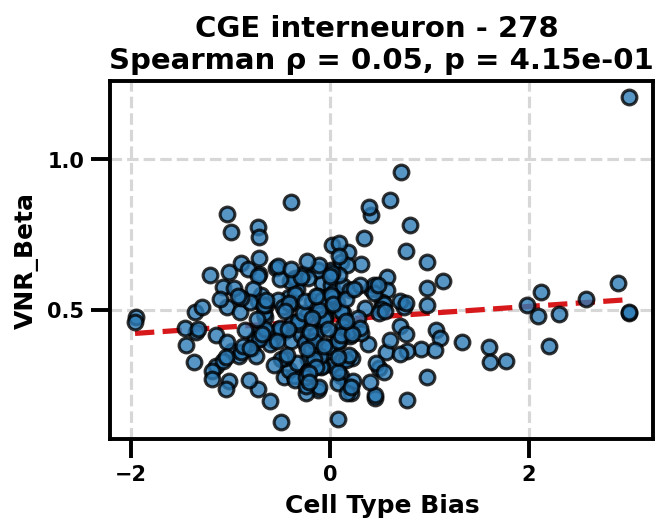

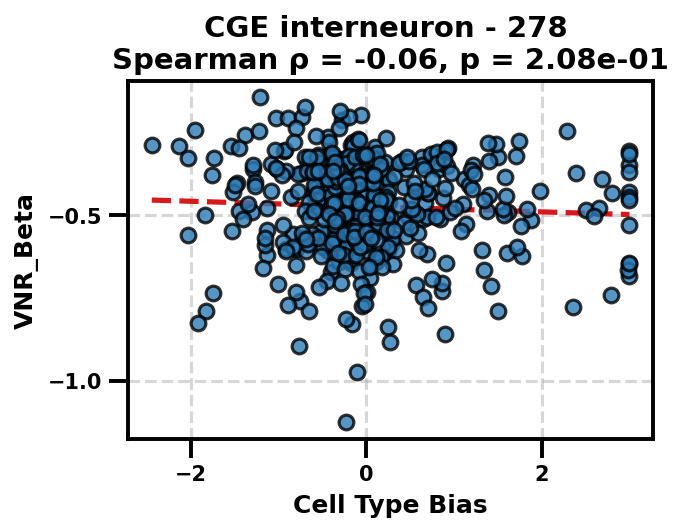

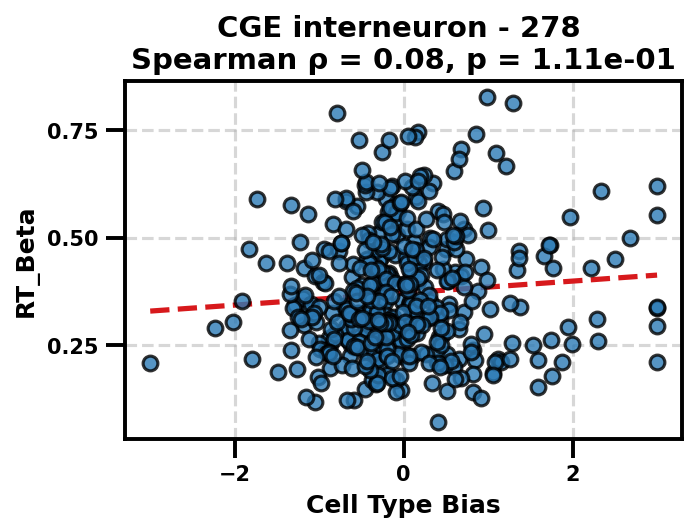

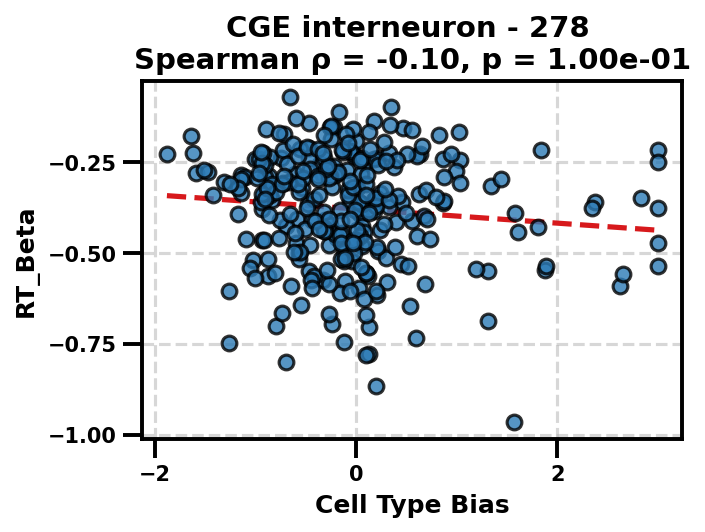

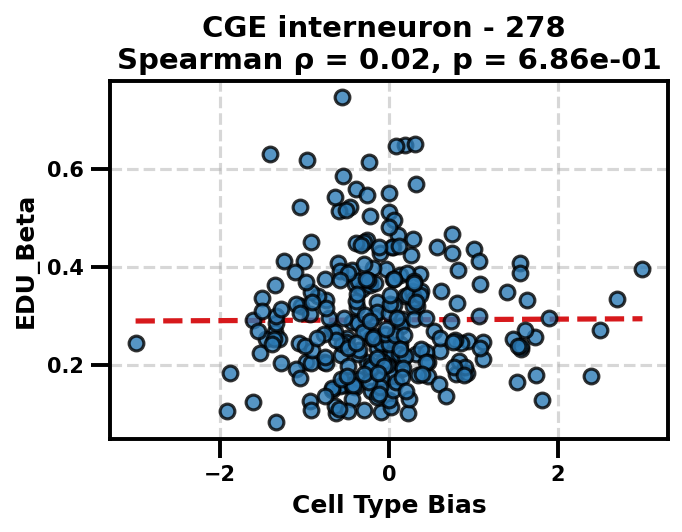

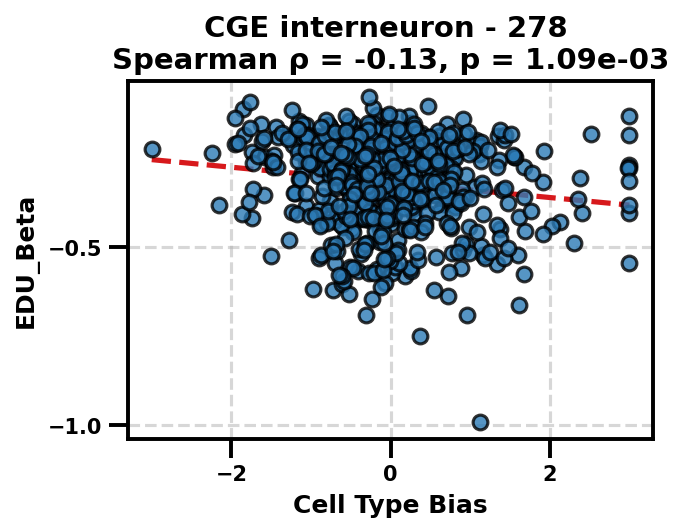

In [184]:
STR = 278
#Plot_Bias_vs_UKBBPheno(STR, VNR_DF)
for DF, name in zip([VNR_DF, RT_DF, EDU_DF], ["VNR", "RT", "EDU"]):
    DF_highConf = DF[DF["P"]<0.05]
    DF_highConf_Pos = DF_highConf[DF_highConf["BETA"]>0]
    DF_highConf_Neg = DF_highConf[DF_highConf["BETA"]<0]
    
    Plot_Bias_vs_UKBBPheno(STR, DF_highConf_Pos, ylabel="{}_Beta".format(name))
    Plot_Bias_vs_UKBBPheno(STR, DF_highConf_Neg, ylabel="{}_Beta".format(name))

In [150]:
VNR_DF_highConf = VNR_DF[VNR_DF["P"]<0.05]
VNR_DF_highConf_Pos = VNR_DF_highConf[VNR_DF_highConf["BETA"]>0]
VNR_DF_highConf_Neg = VNR_DF_highConf[VNR_DF_highConf["BETA"]<0]

In [151]:
IDs, names, supercluster, correlation, pvalues = [],[],[],[],[]
for Idx in Neuron_idx:
    biases, IQs = BiasVsPheno_UKBB(VNR_DF_highConf_Neg, HCT_Z2_MAT_HCT , Idx, 'xx')
    pho, p = spearmanr(biases, IQs)
    #print(pho, p)
    IDs.append(Idx)
    names.append("{}- {}".format(Idx, Anno.loc[Idx, "Supercluster"]))
    supercluster.append(Anno.loc[Idx, "Supercluster"])
    correlation.append(pho)
    pvalues.append(p)
human_ct_df_VNR = pd.DataFrame(data={"ID":IDs, "CT":names, "Supercluster":supercluster, "SpearmanR":correlation, "p":pvalues})
human_ct_df_VNR = human_ct_df_VNR.set_index("ID")
human_ct_df_VNR = human_ct_df_VNR.sort_values("SpearmanR")
human_ct_df_VNR = ADJ_P(human_ct_df_VNR)
human_ct_df_VNR = AnnotateCTDat(human_ct_df_VNR, Anno)
#human_ct_res_df_mutL.to_csv("../dat/Pheno_Bias_vs_IQ/HumanCT.mutL.csv")

In [154]:
#human_ct_df_VNR.head(20)

In [155]:
EDU_DF_highConf = EDU_DF[EDU_DF["P"]<0.05]
EDU_DF_highConf_Pos = EDU_DF_highConf[EDU_DF_highConf["BETA"]>0]
EDU_DF_highConf_Neg = EDU_DF_highConf[EDU_DF_highConf["BETA"]<0]

In [156]:
IDs, names, supercluster, correlation, pvalues = [],[],[],[],[]
for Idx in Neuron_idx:
    biases, IQs = BiasVsPheno_UKBB(EDU_DF_highConf_Neg, HCT_Z2_MAT_HCT , Idx, 'xx')
    pho, p = spearmanr(biases, IQs)
    #print(pho, p)
    IDs.append(Idx)
    names.append("{}- {}".format(Idx, Anno.loc[Idx, "Supercluster"]))
    supercluster.append(Anno.loc[Idx, "Supercluster"])
    correlation.append(pho)
    pvalues.append(p)
human_ct_df_EDU = pd.DataFrame(data={"ID":IDs, "CT":names, "Supercluster":supercluster, "SpearmanR":correlation, "p":pvalues})
human_ct_df_EDU = human_ct_df_EDU.set_index("ID")
human_ct_df_EDU = human_ct_df_EDU.sort_values("SpearmanR")
human_ct_df_EDU = ADJ_P(human_ct_df_EDU)
human_ct_df_EDU = AnnotateCTDat(human_ct_df_EDU, Anno)
#human_ct_res_df_mutL.to_csv("../dat/Pheno_Bias_vs_IQ/HumanCT.mutL.csv")

In [157]:
human_ct_df_EDU.head(20)

CT                 Supercluster  SpearmanR  \
416                     416- Splatter                     Splatter  -0.146460   
132                132- Miscellaneous                Miscellaneous  -0.141687   
278              278- CGE interneuron              CGE interneuron  -0.132175   
277              277- CGE interneuron              CGE interneuron  -0.128479   
180            180- Hippocampal CA1-3            Hippocampal CA1-3  -0.127017   
415                     415- Splatter                     Splatter  -0.125798   
294              294- CGE interneuron              CGE interneuron  -0.123803   
288              288- CGE interneuron              CGE interneuron  -0.122886   
176                176- Miscellaneous                Miscellaneous  -0.121193   
177                177- Miscellaneous                Miscellaneous  -0.115651   
295              295- CGE interneuron              CGE interneuron  -0.114234   
438  438- Midbrain-derived inhibitory  Midbrain-derived inhibitory  -0.107654   
267    267- LAMP5-LHX6 and Chandelier    LAMP5-LHX6 and Chandelier  -0.107459   
268    268- LAMP5-LHX6 and Chandelier    LAMP5-LHX6 and Chandelier  -0.107065   
434  434- Midbrain-derived inhibitory  Midbrain-derived inhibitory  -0.105177   
417                     417- Splatter                     Splatter  -0.102522   
335                     335- Splatter                     Splatter  -0.101777   
459          459- Thalamic excitatory          Thalamic excitatory  -0.099824   
270    270- LAMP5-LHX6 and Chandelier    LAMP5-LHX6 and Chandelier  -0.098141   
193              193- Hippocampal CA4              Hippocampal CA4  -0.096058   

            p     p_adj Class         Subtype Neurotransmitter  \
416  0.000291  0.087480  NEUR                             GABA   
132  0.000458  0.087480  NEUR                    VGLUT1 VGLUT2   
278  0.001088  0.114717  NEUR                      GABA VGLUT3   
277  0.001500  0.114717  NEUR                      GABA VGLUT3   
180  0.001700  0.114717  NEUR                           VGLUT1   
415  0.001884  0.114717  NEUR                      GABA VGLUT2   
294  0.002227  0.114717  NEUR         INT-VIP             GABA   
288  0.002402  0.114717  NEUR       INT-LAMP5             GABA   
176  0.002760  0.117163  NEUR                    VGLUT1 VGLUT2   
177  0.004298  0.152787  NEUR                    VGLUT1 VGLUT2   
295  0.004800  0.152787  NEUR         INT-VIP             GABA   
438  0.007890  0.174833  NEUR                             GABA   
267  0.008004  0.174833  NEUR  INT-LAMP5-LHX6      GABA VGLUT3   
268  0.008238  0.174833  NEUR  INT-LAMP5-LHX6             GABA   
434  0.009451  0.190015  NEUR                             GABA   
417  0.011425  0.218216  NEUR                         GABA HDC   
335  0.012041  0.219024  NEUR                           VGLUT2   
459  0.013796  0.239555  NEUR                           VGLUT2   
270  0.015486  0.257206  NEUR  INT-LAMP5-LHX6             GABA   
193  0.017828  0.269786  NEUR                           VGLUT1   

                                     Top three regions  \
416  Hypothalamus: 65.4%, Thalamus: 17.9%, Amygdala...   
132  Cerebral cortex: 98.4%, Hippocampus: 0.8%, Mid...   
278  Cerebral cortex: 78.0%, Amygdala: 10.4%, Hippo...   
277  Cerebral cortex: 77.4%, Amygdala: 13.3%, Hippo...   
180  Hippocampus: 99.6%, Cerebral cortex: 0.4%, Amy...   
415  Hypothalamus: 78.7%, Midbrain: 7.6%, Thalamus:...   
294  Cerebral cortex: 64.4%, Hippocampus: 14.7%, Am...   
288  Cerebral cortex: 70.6%, Amygdala: 13.7%, Hippo...   
176  Hippocampus: 98.8%, Cerebral cortex: 1.0%, Tha...   
177  Hippocampus: 68.2%, Midbrain: 20.5%, Cerebral ...   
295  Cerebral cortex: 67.0%, Amygdala: 17.8%, Hippo...   
438  Midbrain: 44.9%, Thalamus: 38.0%, Hypothalamus...   
267  Hippocampus: 80.6%, Cerebral cortex: 13.8%, Am...   
268  Hippocampus: 95.5%, Cerebral cortex: 2.4%, Amy...   
434        Thalamus: 89.3%, Midbrain: 8.9%, Pons: 1.3%   
417  Hypothalamus:

In [158]:
RT_DF_highConf = RT_DF[RT_DF["P"]<0.05]
RT_DF_highConf_Pos = RT_DF_highConf[RT_DF_highConf["BETA"]>0]
RT_DF_highConf_Neg = RT_DF_highConf[RT_DF_highConf["BETA"]<0]

In [160]:
IDs, names, supercluster, correlation, pvalues = [],[],[],[],[]
for Idx in Neuron_idx:
    biases, IQs = BiasVsPheno_UKBB(RT_DF_highConf_Pos, HCT_Z2_MAT_HCT , Idx, 'xx')
    pho, p = spearmanr(biases, IQs)
    #print(pho, p)
    IDs.append(Idx)
    names.append("{}- {}".format(Idx, Anno.loc[Idx, "Supercluster"]))
    supercluster.append(Anno.loc[Idx, "Supercluster"])
    correlation.append(pho)
    pvalues.append(p)
human_ct_df_RT = pd.DataFrame(data={"ID":IDs, "CT":names, "Supercluster":supercluster, "SpearmanR":correlation, "p":pvalues})
human_ct_df_RT = human_ct_df_RT.set_index("ID")
human_ct_df_RT = human_ct_df_RT.sort_values("SpearmanR")
human_ct_df_RT = ADJ_P(human_ct_df_RT)
human_ct_df_RT = AnnotateCTDat(human_ct_df_RT, Anno)
#human_ct_res_df_mutL.to_csv("../dat/Pheno_Bias_vs_IQ/HumanCT.mutL.csv")

In [169]:
human_ct_df_RT = human_ct_df_RT.sort_values("SpearmanR", ascending=False)

In [170]:

human_ct_df_RT.head(20)

CT                 Supercluster  SpearmanR  \
353                     353- Splatter                     Splatter   0.188316   
415                     415- Splatter                     Splatter   0.168201   
439  439- Midbrain-derived inhibitory  Midbrain-derived inhibitory   0.156795   
438  438- Midbrain-derived inhibitory  Midbrain-derived inhibitory   0.156763   
399                     399- Splatter                     Splatter   0.156284   
371                     371- Splatter                     Splatter   0.144223   
444  444- Midbrain-derived inhibitory  Midbrain-derived inhibitory   0.141205   
435  435- Midbrain-derived inhibitory  Midbrain-derived inhibitory   0.140245   
132                132- Miscellaneous                Miscellaneous   0.137805   
390                     390- Splatter                     Splatter   0.132965   
417                     417- Splatter                     Splatter   0.131691   
180            180- Hippocampal CA1-3            Hippocampal CA1-3   0.131486   
433  433- Midbrain-derived inhibitory  Midbrain-derived inhibitory   0.130192   
410                     410- Splatter                     Splatter   0.129853   
381                     381- Splatter                     Splatter   0.129271   
296              296- CGE interneuron              CGE interneuron   0.127197   
416                     416- Splatter                     Splatter   0.123788   
436  436- Midbrain-derived inhibitory  Midbrain-derived inhibitory   0.123388   
288              288- CGE interneuron              CGE interneuron   0.120736   
340                     340- Splatter                     Splatter   0.118691   

            p     p_adj Class    Subtype Neurotransmitter  \
353  0.000099  0.018996  NEUR                        GABA   
415  0.000521  0.049744  NEUR                 GABA VGLUT2   
439  0.001232  0.069766  NEUR                        GABA   
438  0.001235  0.069766  NEUR                        GABA   
399  0.001278  0.069766  NEUR                      VGLUT2   
371  0.002983  0.107715  NEUR                      VGLUT2   
444  0.003653  0.107715  NEUR                        GABA   
435  0.003893  0.107715  NEUR                        GABA   
132  0.004568  0.110336  NEUR               VGLUT1 VGLUT2   
390  0.006229  0.111228  NEUR                        GABA   
417  0.006747  0.111228  NEUR                    GABA HDC   
180  0.006834  0.111228  NEUR                      VGLUT1   
433  0.007407  0.111228  NEUR                        GABA   
410  0.007564  0.111228  NEUR                      VGLUT2   
381  0.007841  0.111228  NEUR                        GABA   
296  0.008901  0.121432  NEUR    INT-VIP             GABA   
416  0.010922  0.125657  NEUR                        GABA   
436  0.011184  0.125657  NEUR                        GABA   
288  0.013066  0.142603  NEUR  INT-LAMP5             GABA   
340  0.014703  0.155639  NEUR                      VGLUT2   

                                     Top three regions  \
353  Thalamus: 97.2%, Midbrain: 2.2%, Hypothalamus:...   
415  Hypothalamus: 78.7%, Midbrain: 7.6%, Thalamus:...   
439      Midbrain: 52.8%, Thalamus: 31.3%, Pons: 10.7%   
438  Midbrain: 44.9%, Thalamus: 38.0%, Hypothalamus...   
399  Medulla: 99.3%, Pons: 0.5%, Cerebral cortex: 0.1%   
371  Midbrain: 99.7%, Cerebellum: 0.3%, Cerebral co...   
444       Thalamus: 83.2%, Midbrain: 14.0%, Pons: 1.9%   
435       Midbrain: 54.9%, Thalamus: 43.2%, Pons: 0.8%   
132  Cerebral cortex: 98.4%, Hippocampus: 0.8%, Mid...   
390        Thalamus: 81.4%, Amygdala: 5.6%, Pons: 5.3%   
417  Hypothalamus: 95.8%, Midbrain: 4.0%, Amygdala:...   
180  Hippocampus: 99.6%, Cerebral cortex: 0.4%, Amy...   
433  Midbrain: 89.4%, Thalamus: 8.3%, Hypothalamus:...   
410  Hypothalamus: 82.0%, Thalamus: 11.6%, Amygdala...   
381        Pons: 83.9%, Midbrain: 15.4%, Medulla: 0.5%   
296  Cerebral cortex: 72.9%, Amygdala: 10.5%, Hippo...   
416  Hypothalamus: 65.4%, Thalamus: 17.9%, Amygdala...   
436  Th

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def SuperClusterBias_BoxPlot_CorrIQ(DF1, label="RT", flip_axis=True):
    dat_Z2 = []
    mean_Z2 = []
    for _CT in Neurons:
        tmp = DF1[DF1["Supercluster"] == _CT]
        dat_Z2.append(tmp["SpearmanR"].values)
        mean_Z2.append(np.mean(tmp["SpearmanR"].values))
    mean_Z2 = np.array(mean_Z2)

    # Sorting data by the mean values
    if flip_axis:
        sort_idx = np.argsort(mean_Z2)[::-1]  # Reverse the sorting order
    else:
        sort_idx = np.argsort(mean_Z2)
    show_dat_Z2 = [dat_Z2[x] for x in sort_idx]
    show_CTs = [ALL_CTs[x] for x in sort_idx]

    # Create a figure and axis
    fig, ax = plt.subplots(dpi=480, figsize=(8, 12))

    # Customize the boxplot to only show the edges with the same color
    boxprops = dict(linestyle='-', linewidth=1.5, color='royalblue')
    medianprops = dict(linestyle='-', linewidth=2.5, color='royalblue')
    whiskerprops = dict(color='royalblue', linewidth=1.5)
    capprops = dict(color='royalblue', linewidth=1.5)
    flierprops = dict(marker='', color='royalblue', alpha=0.5)  # Adjusted to not show outliers

    # Use Seaborn to set the context for publication-quality plots
    sns.set_context("talk", font_scale=1.2)

    # Draw the boxplot
    bp = ax.boxplot(show_dat_Z2, labels=show_CTs, vert=False, patch_artist=False,
                    boxprops=boxprops, medianprops=medianprops, 
                    whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)

    # Overlay each data point on the boxplot
    for i in range(len(show_dat_Z2)):
        y = np.random.normal(i + 1, 0.1, size=len(show_dat_Z2[i]))  # jitter for better visibility
        ax.plot(show_dat_Z2[i], y, 'o', markersize=2, color='black', alpha=0.7)

    # Add grid lines
    ax.grid(True, axis='x', linestyle='--', alpha=0.6)

    # Add labels and title
    ax.set_xlabel("Bias Correlation With {}".format(label), fontsize=14)
    ax.set_ylabel("Supercluster", fontsize=14)

    # Flip the x-axis
    if flip_axis:
        ax.invert_xaxis()

    # Adjust the tick parameters for better readability
    ax.tick_params(axis='both', which='major', labelsize=13, grid_alpha=0.5)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    # Show the plot
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_97759/1281983375.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(show_dat_Z2, labels=show_CTs, vert=False, patch_artist=False,


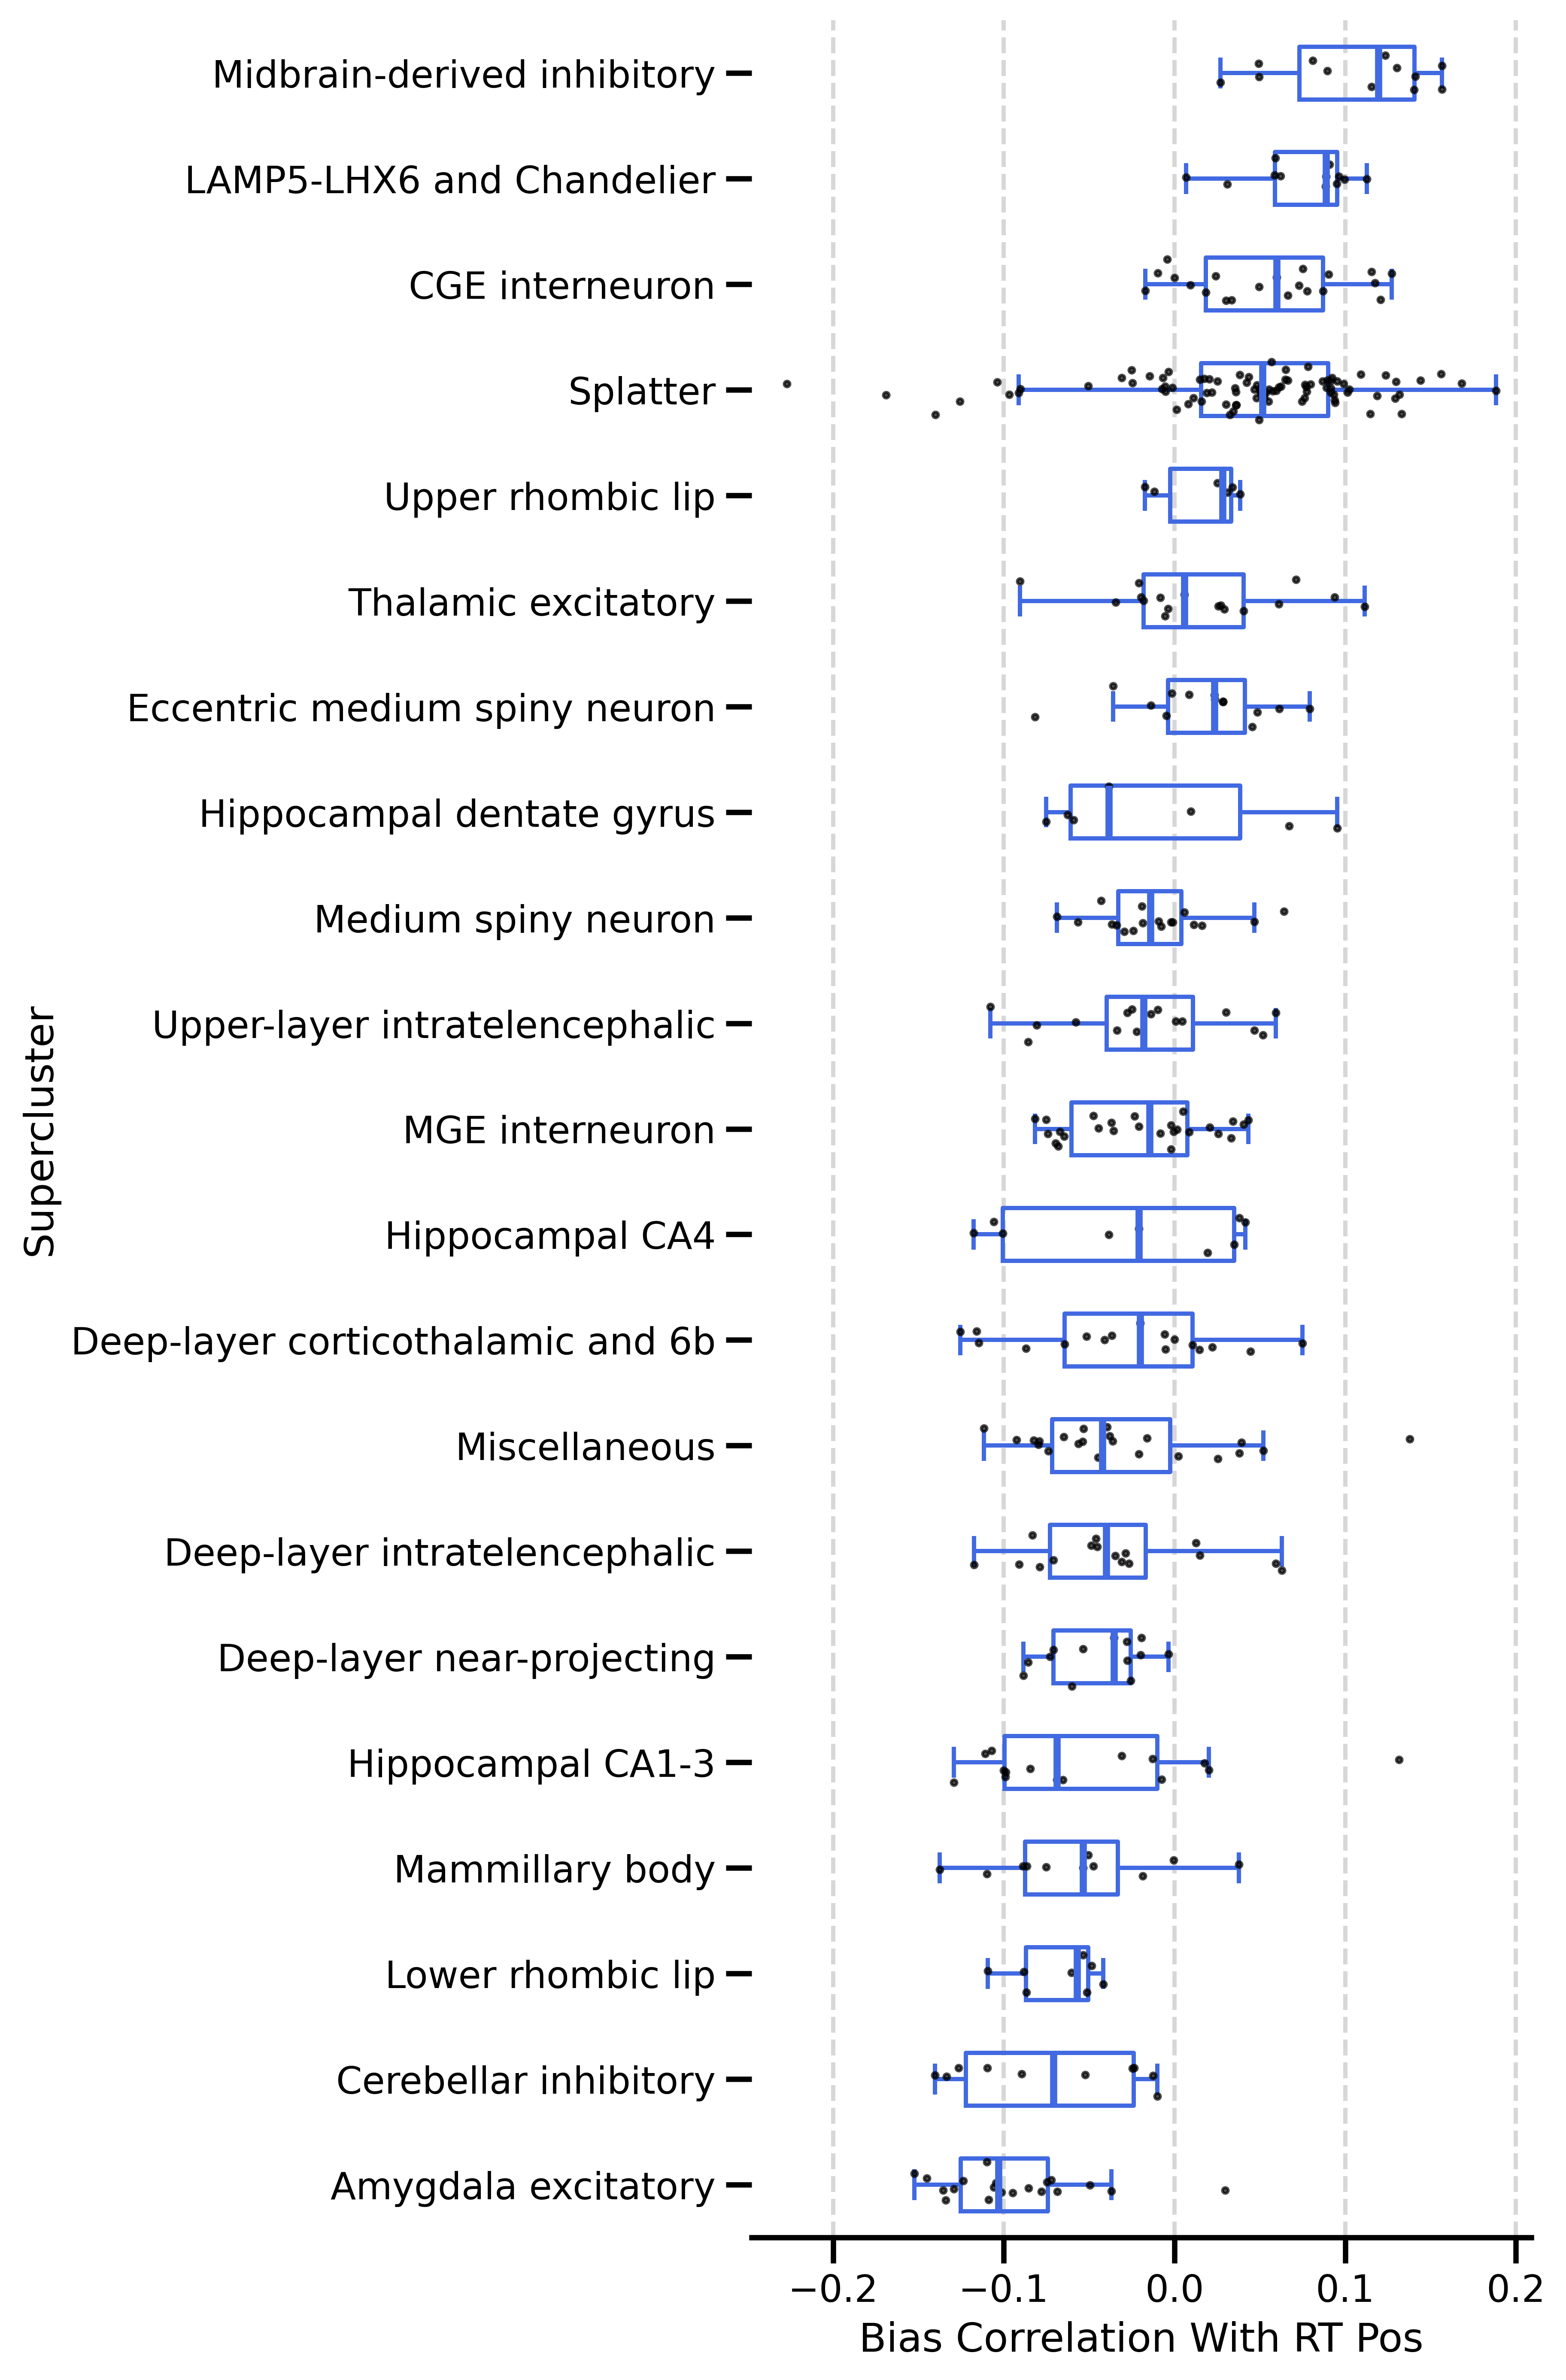

In [181]:
# Example usage with your DataFrames DF1 and DF2
SuperClusterBias_BoxPlot_CorrIQ(human_ct_df_RT, "RT Pos", flip_axis=False)

/tmp/ipykernel_97759/1281983375.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(show_dat_Z2, labels=show_CTs, vert=False, patch_artist=False,


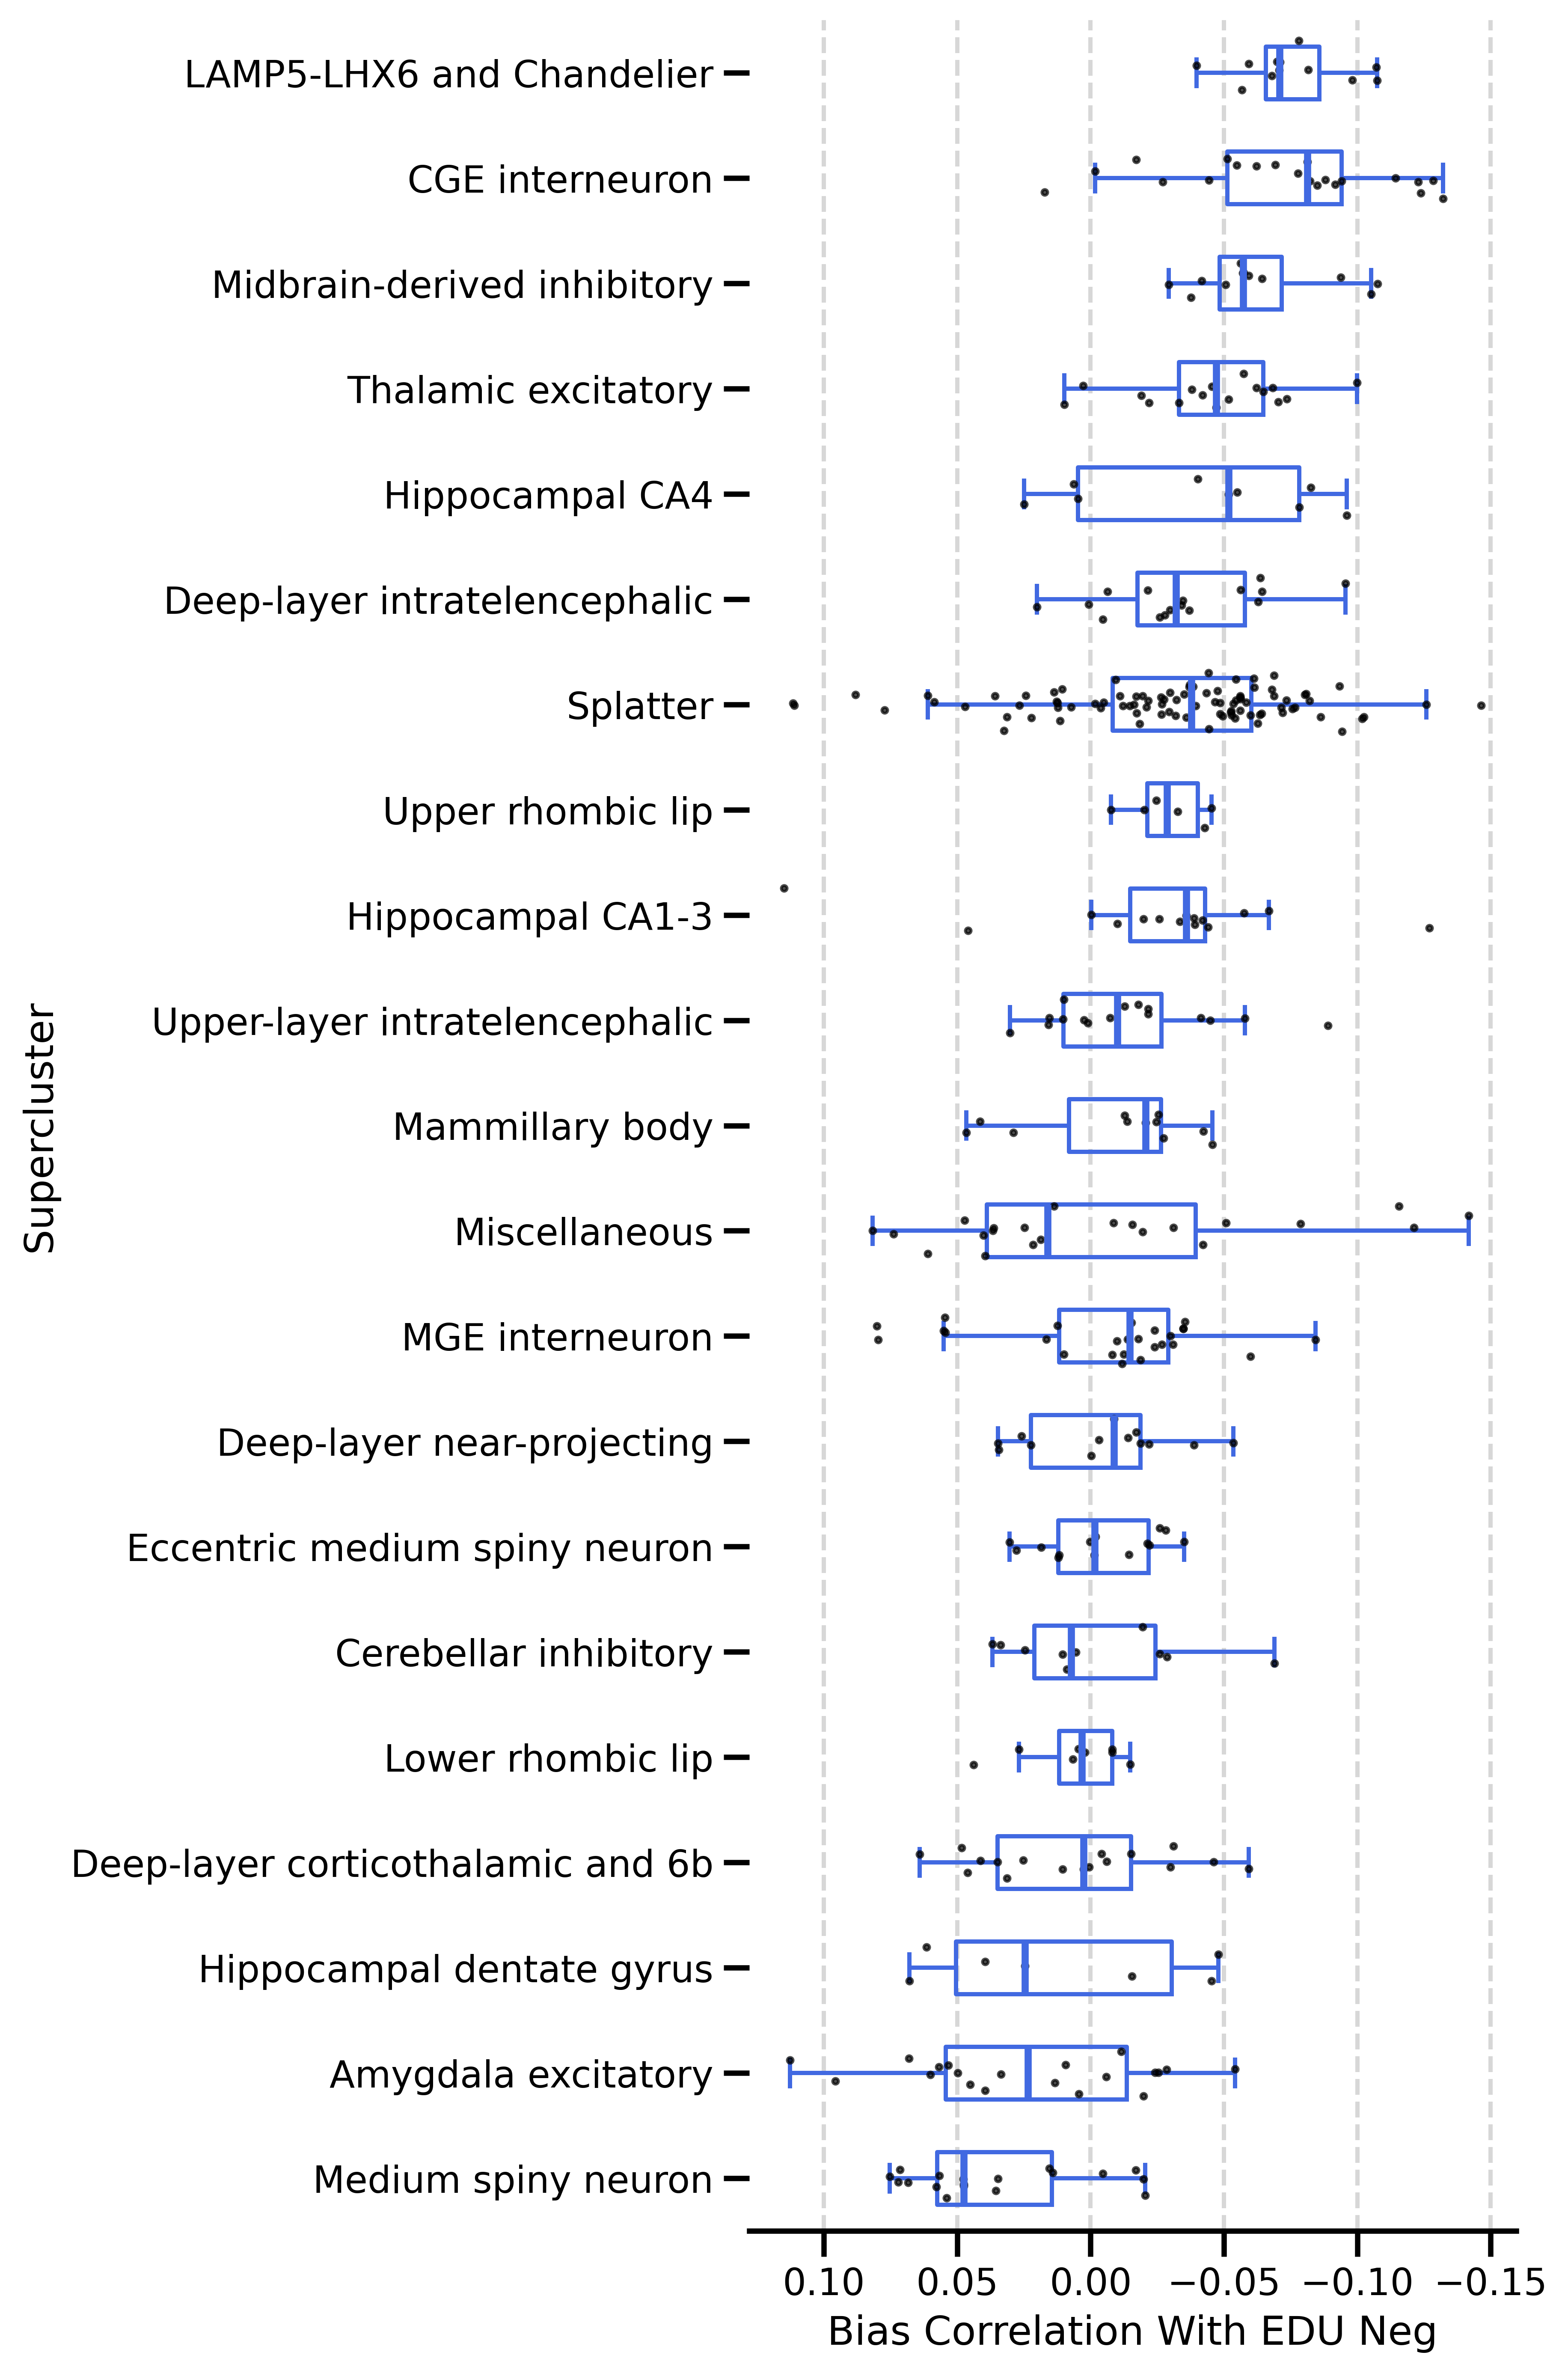

In [182]:
# Example usage with your DataFrames DF1 and DF2
SuperClusterBias_BoxPlot_CorrIQ(human_ct_df_EDU, "EDU Neg")

/tmp/ipykernel_97759/1281983375.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(show_dat_Z2, labels=show_CTs, vert=False, patch_artist=False,


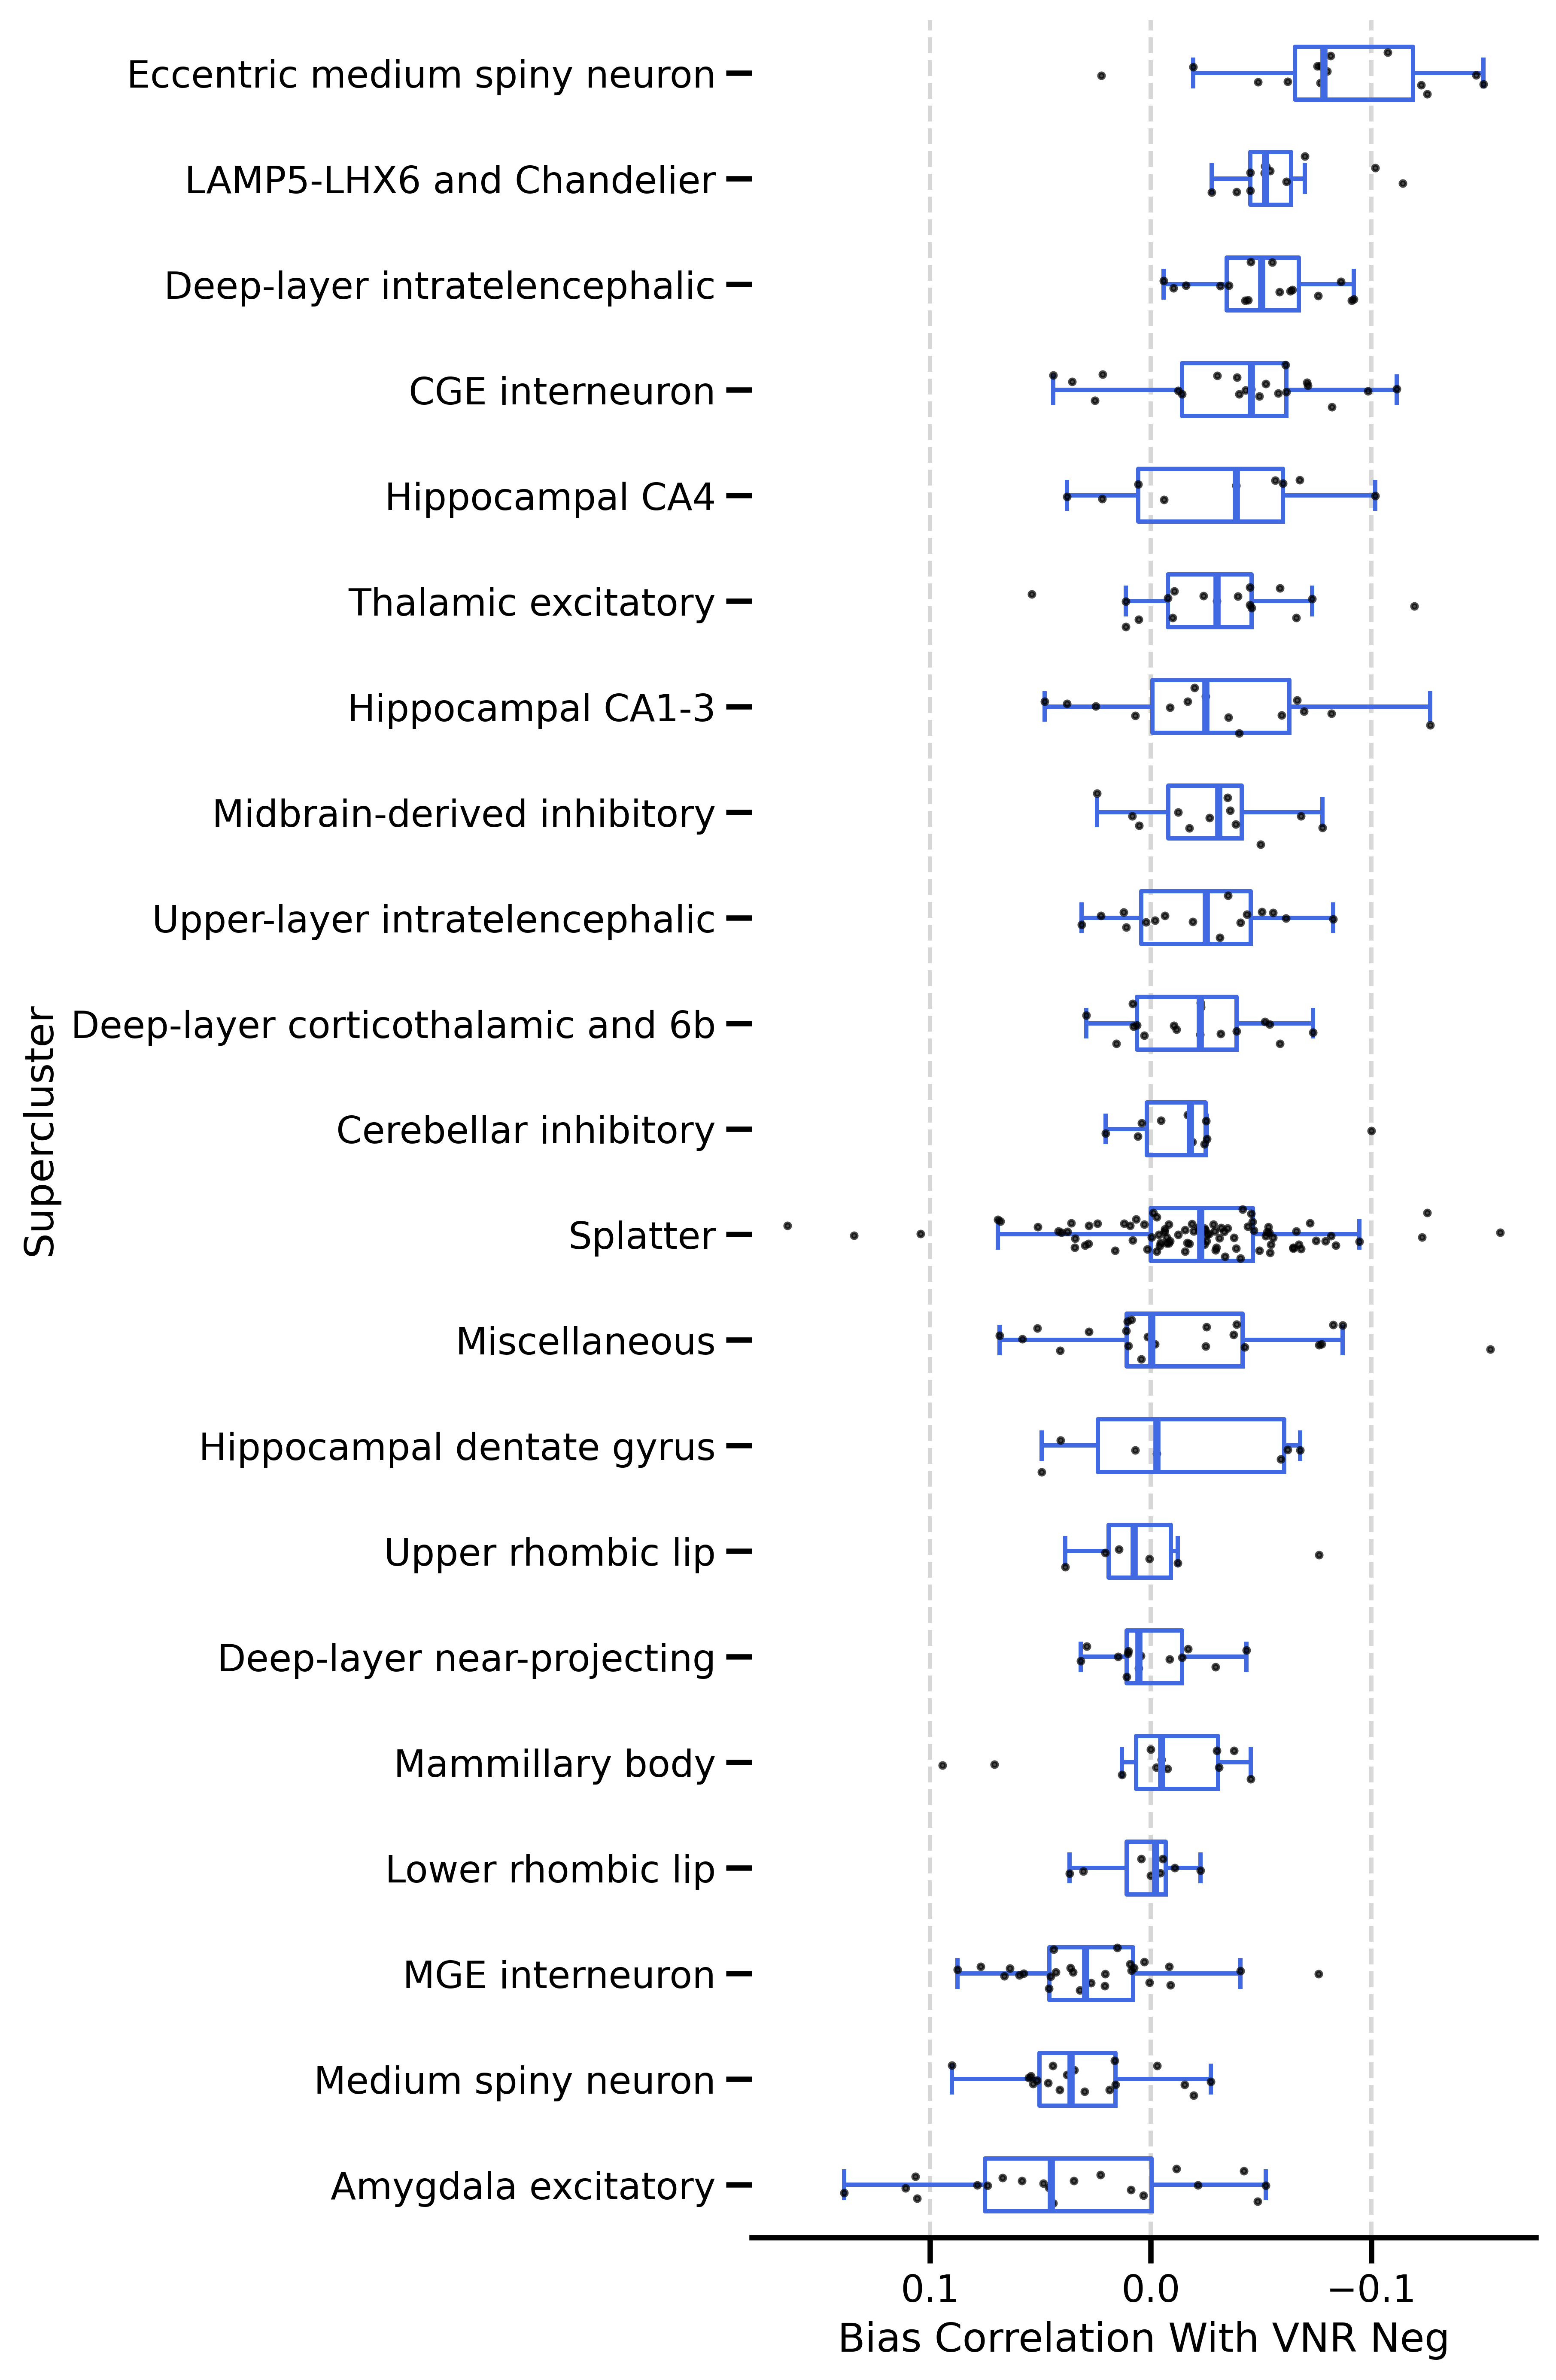

In [183]:

# Example usage with your DataFrames DF1 and DF2
SuperClusterBias_BoxPlot_CorrIQ(human_ct_df_VNR, "VNR Neg")